In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,KFold,train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,LabelEncoder,OrdinalEncoder,OneHotEncoder
from sklearn.datasets import make_classification,make_regression
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,log_loss,classification_report,roc_auc_score
from sklearn.dummy import DummyClassifier,DummyRegressor
from mlxtend.plotting import plot_decision_regions

In [3]:
df=pd.read_csv(r"C:\Users\Ganji Bhaskar\Downloads\Dry_Bean_Dataset.csv")

In [4]:
df

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1          0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2          0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3          0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4          0.333680       30417     195.896503  0.773098  0.990893   0.984877   
...             ...         ...            ...       ...       ...        ...   
13606      0.765002       42508     231.515799  0.714574  0.990331   0.916603   
13607      0.735702       42494     231.526798  0.799943  0.990752   0.922015   
13608      0.734065       42569     231.631261  0.729932  0.989899   0.918424   
13609      0.741055       42667     231.653247  0.705389  0.987813   0.907906   
13610      0.786693       42600     231.686223  0.788962  0.989648   0.888380   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0         0.913358      0.007332      0.003147      0.834222      0.998724   
1         0.953861      0.006979      0.003564      0.909851      0.998430   
2         0.908774      0.007244      0.003048      0.825871      0.999066   
3         0.928329      0.007017      0.003215      0.861794      0.994199   
4         0.970516      0.006697      0.003665      0.941900      0.999166   
...            ...           ...           ...           ...           ...   
13606     0.801865      0.006858      0.001749      0.642988      0.998385   
13607     0.822252      0.006688      0.001886      0.676099      0.998219   
13608     0.822730      0.006681      0.001888      0.676884      0.996767   
13609     0.817457      0.006724      0.001852      0.668237      0.995222   
13610     0.784997      0.007001      0.001640      0.616221      0.998180   

          Class  
0         SEKER  
1         SEKER  
2         SEKER  
3         SEKER  
4         SEKER  
...         ...  
13606  DERMASON  
13607  DERMASON  
13608  DERMASON  
13609  DERMASON  
13610  DERMASON  

[13611 rows x 17 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [6]:
df.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [7]:
df.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860154       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432307      0.715928   36714.500000     215.068003      0.718634   
50%        1.551124      0.764441   45178.000000     238.438026      0.759859   
75%        1.707109      0.810466   62294.000000     279.446467      0.786851   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean       0.987143      0.873282      0.799864      0.006564      0.001716   
std        0.004660      0.059520      0.061713      0.001128      0.000596   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985670      0.832096      0.762469      0.005900      0.001154   
50%        0.988283      0.883157      0.801277      0.006645      0.001694   
75%        0.990013      0.916869      0.834270      0.007271      0.002170   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13611.000000  13611.000000  
mean       0.643590      0.995063  
std        0.098996      0.004366  
min        0.410339      0.947687  
25%        0.581359      0.993703  
50%        0.642044      0.996386  
75%        0.696006      0.997883  
max        0.974767      0.999733

In [8]:
df.describe(include="object")

Class
count      13611
unique         7
top     DERMASON
freq        3546

In [9]:
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

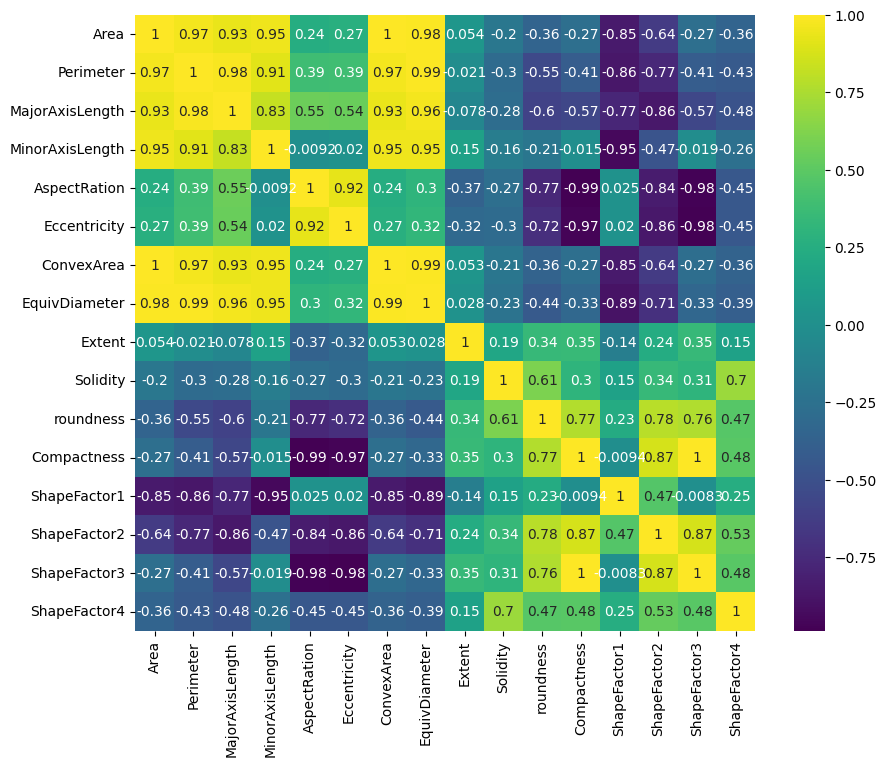

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='viridis')
plt.show()

In [11]:
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

<Axes: xlabel='Class'>

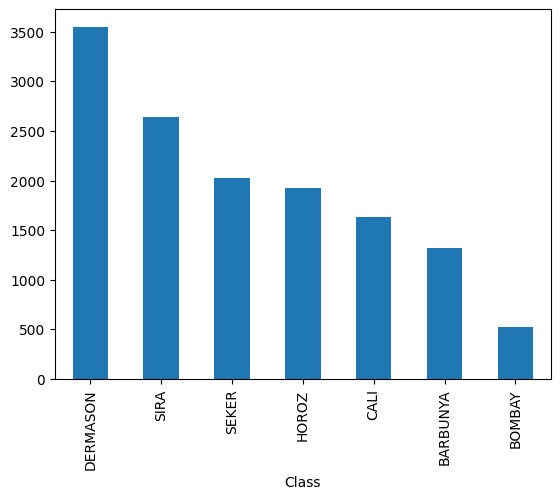

In [12]:
df["Class"].value_counts().plot.bar()

C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_724\265483338.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], bins=10, hist_kws={'color': 'blue', 'edgecolor': 'black'}, kde_kws={'color': 'red', 'fill': True}, label='Combined Plot')


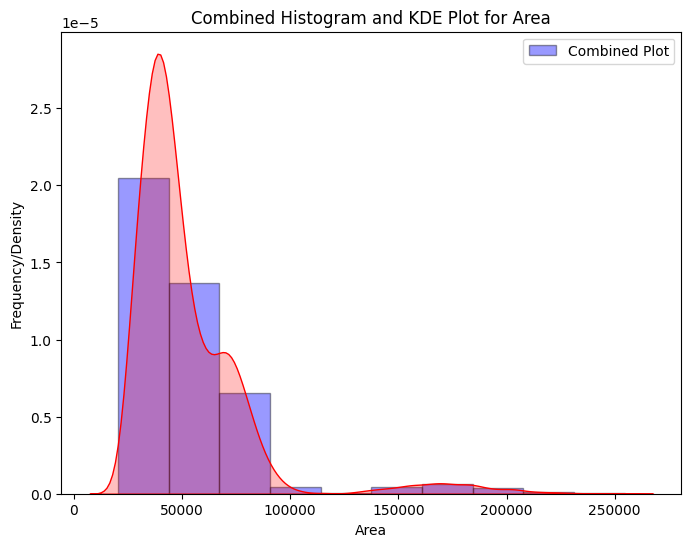

C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_724\265483338.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], bins=10, hist_kws={'color': 'blue', 'edgecolor': 'black'}, kde_kws={'color': 'red', 'fill': True}, label='Combined Plot')


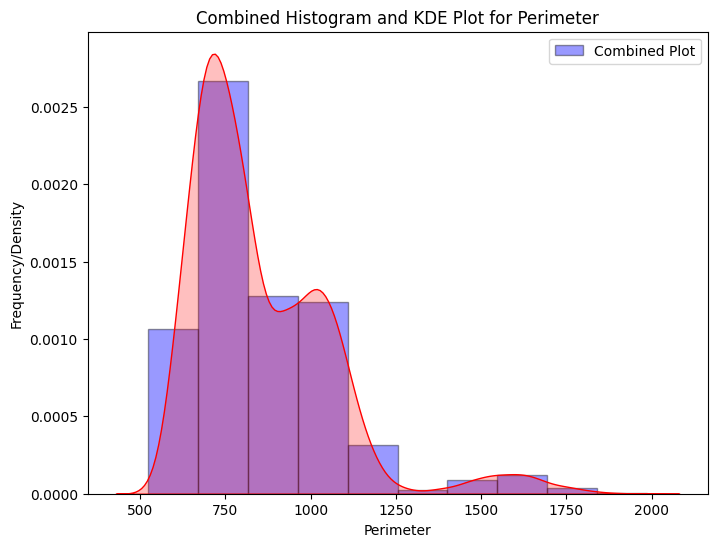

C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_724\265483338.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], bins=10, hist_kws={'color': 'blue', 'edgecolor': 'black'}, kde_kws={'color': 'red', 'fill': True}, label='Combined Plot')


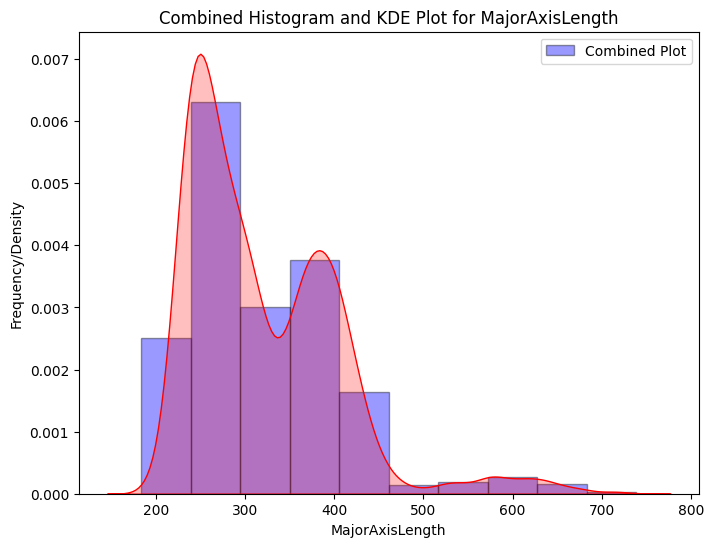

C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_724\265483338.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], bins=10, hist_kws={'color': 'blue', 'edgecolor': 'black'}, kde_kws={'color': 'red', 'fill': True}, label='Combined Plot')


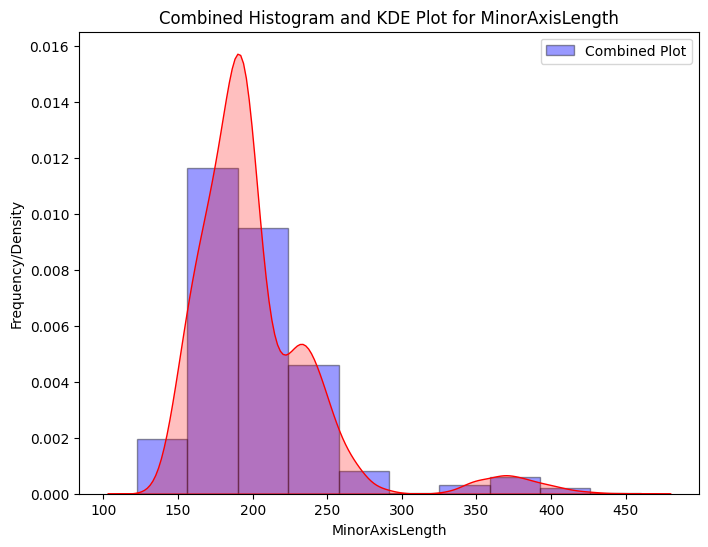

C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_724\265483338.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], bins=10, hist_kws={'color': 'blue', 'edgecolor': 'black'}, kde_kws={'color': 'red', 'fill': True}, label='Combined Plot')


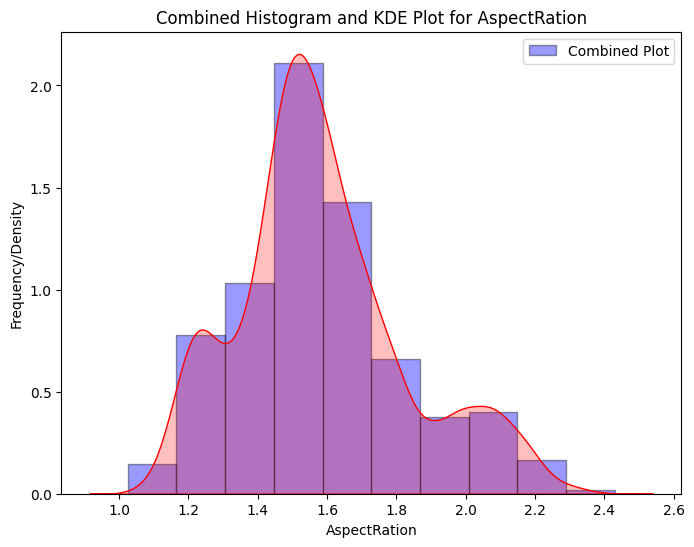

C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_724\265483338.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], bins=10, hist_kws={'color': 'blue', 'edgecolor': 'black'}, kde_kws={'color': 'red', 'fill': True}, label='Combined Plot')


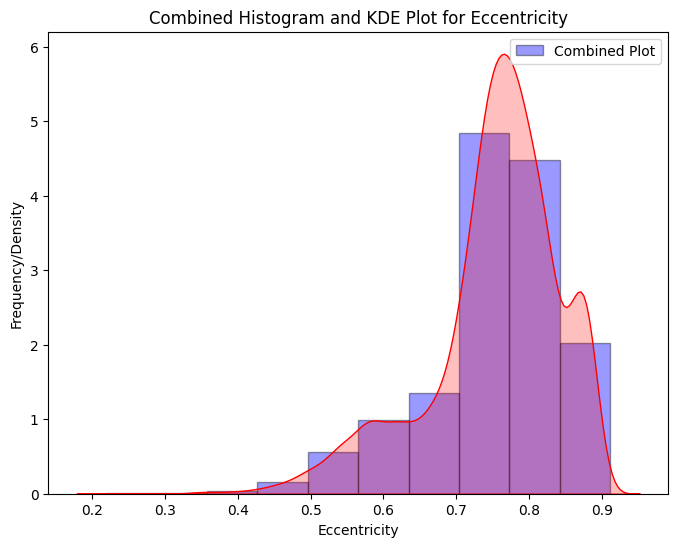

C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_724\265483338.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], bins=10, hist_kws={'color': 'blue', 'edgecolor': 'black'}, kde_kws={'color': 'red', 'fill': True}, label='Combined Plot')


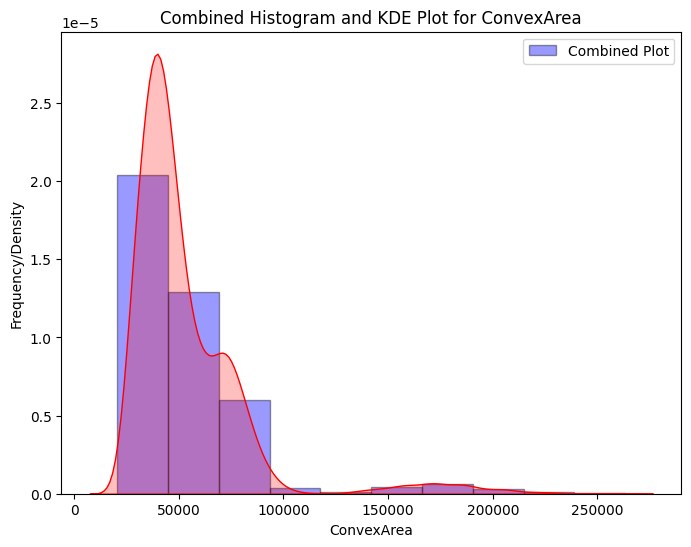

C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_724\265483338.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], bins=10, hist_kws={'color': 'blue', 'edgecolor': 'black'}, kde_kws={'color': 'red', 'fill': True}, label='Combined Plot')


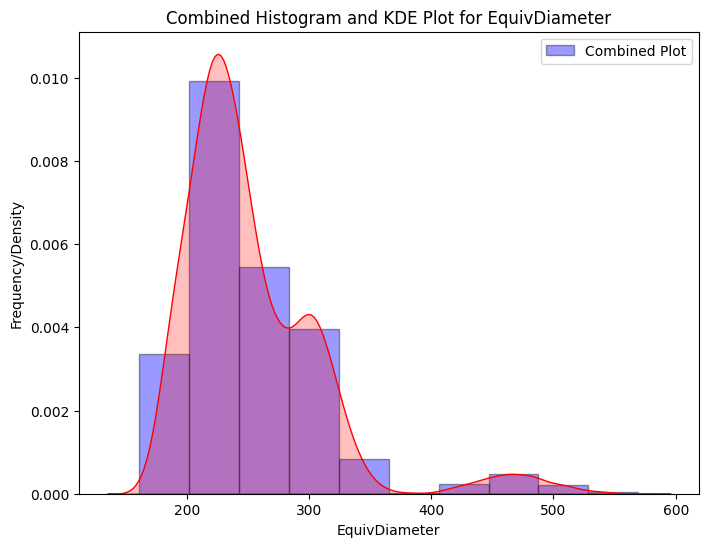

C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_724\265483338.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], bins=10, hist_kws={'color': 'blue', 'edgecolor': 'black'}, kde_kws={'color': 'red', 'fill': True}, label='Combined Plot')


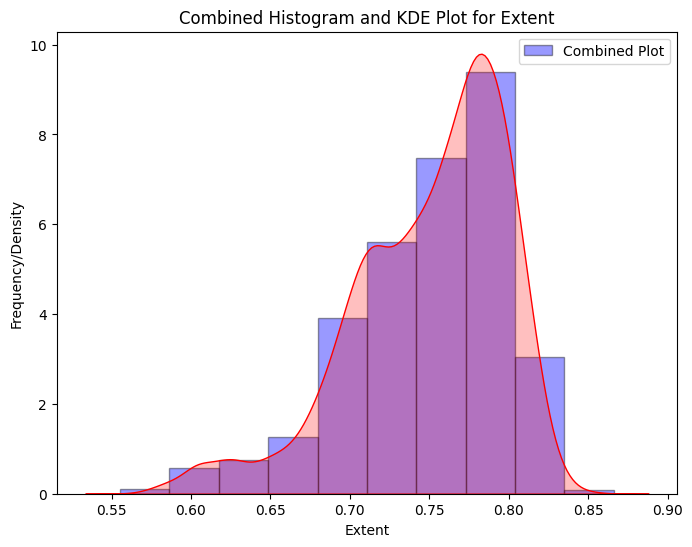

C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_724\265483338.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], bins=10, hist_kws={'color': 'blue', 'edgecolor': 'black'}, kde_kws={'color': 'red', 'fill': True}, label='Combined Plot')


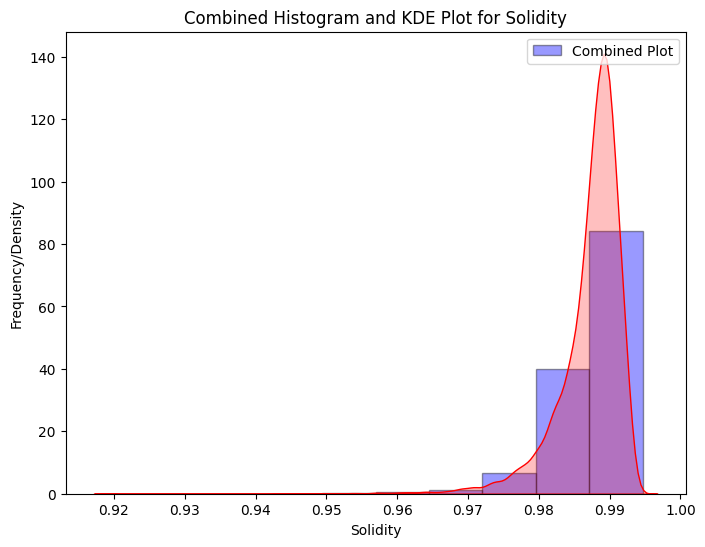

C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_724\265483338.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], bins=10, hist_kws={'color': 'blue', 'edgecolor': 'black'}, kde_kws={'color': 'red', 'fill': True}, label='Combined Plot')


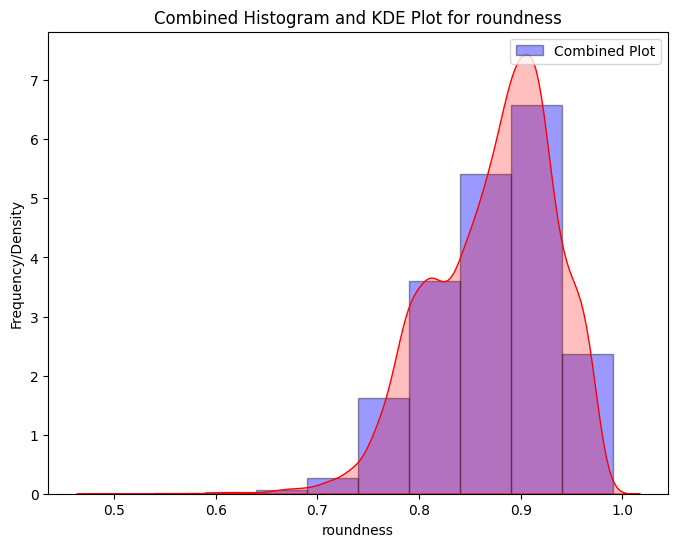

C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_724\265483338.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], bins=10, hist_kws={'color': 'blue', 'edgecolor': 'black'}, kde_kws={'color': 'red', 'fill': True}, label='Combined Plot')


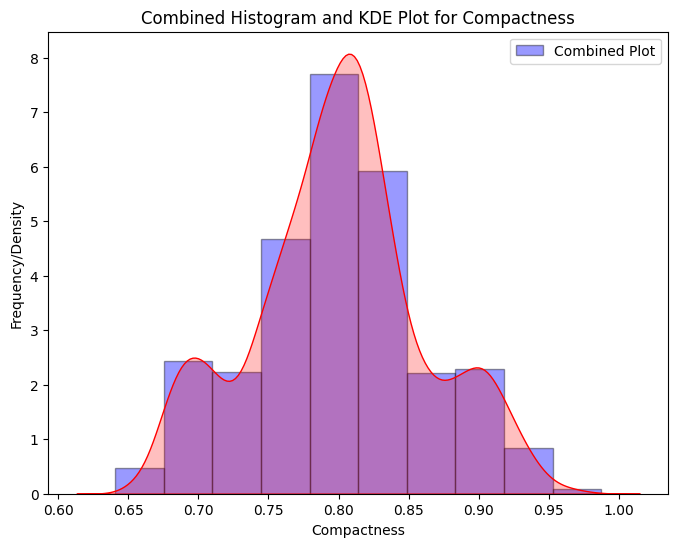

C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_724\265483338.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], bins=10, hist_kws={'color': 'blue', 'edgecolor': 'black'}, kde_kws={'color': 'red', 'fill': True}, label='Combined Plot')


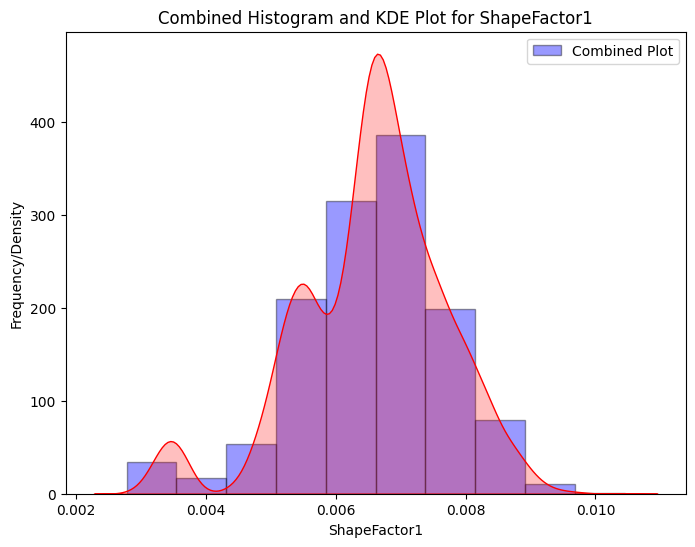

C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_724\265483338.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], bins=10, hist_kws={'color': 'blue', 'edgecolor': 'black'}, kde_kws={'color': 'red', 'fill': True}, label='Combined Plot')


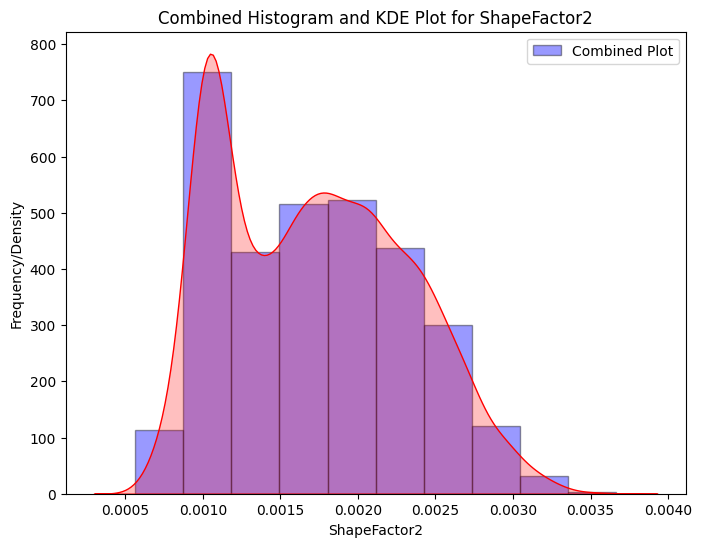

C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_724\265483338.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], bins=10, hist_kws={'color': 'blue', 'edgecolor': 'black'}, kde_kws={'color': 'red', 'fill': True}, label='Combined Plot')


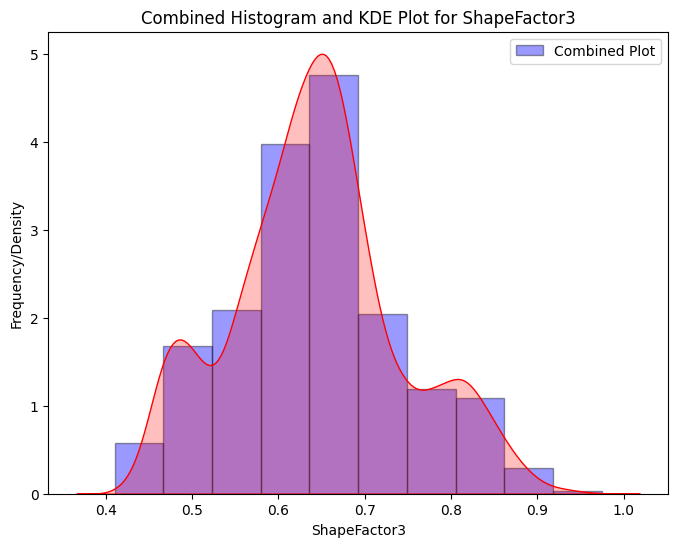

C:\Users\Ganji Bhaskar\AppData\Local\Temp\ipykernel_724\265483338.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], bins=10, hist_kws={'color': 'blue', 'edgecolor': 'black'}, kde_kws={'color': 'red', 'fill': True}, label='Combined Plot')


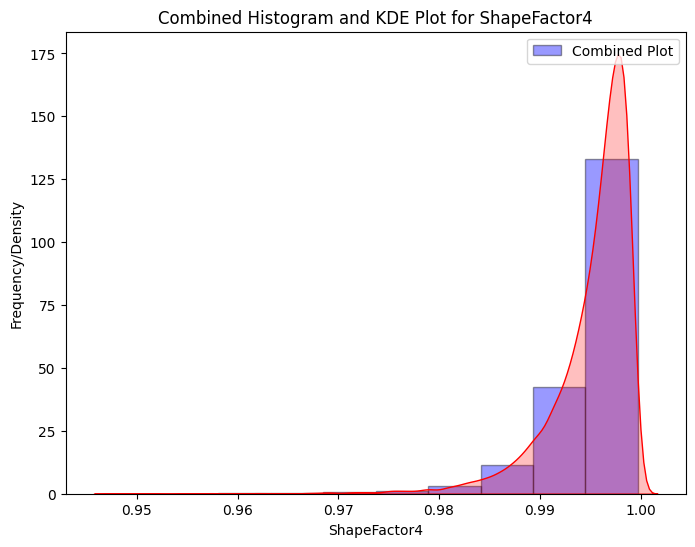

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
for column in df.columns[:-1]:
    plt.figure(figsize=(8, 6))
    
    # Using sns.distplot for combined histogram and KDE plot
    sns.distplot(df[column], bins=10, hist_kws={'color': 'blue', 'edgecolor': 'black'}, kde_kws={'color': 'red', 'fill': True}, label='Combined Plot')
    
    plt.title(f'Combined Histogram and KDE Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency/Density')
    plt.legend()
    
    plt.show()


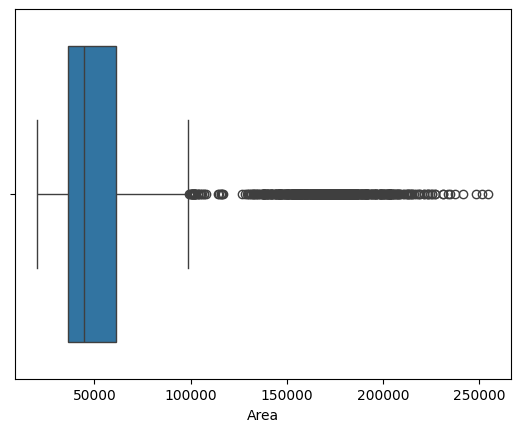

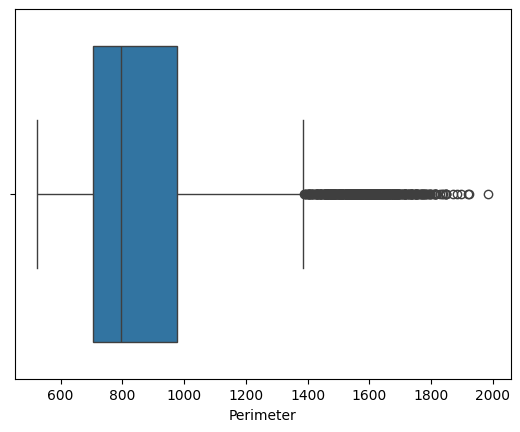

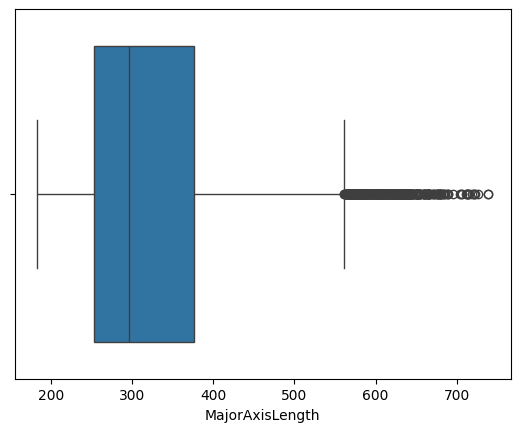

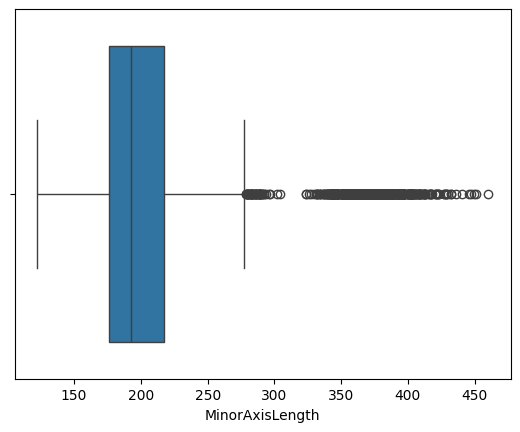

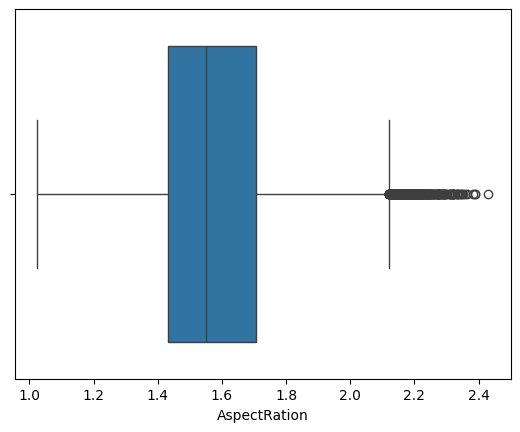

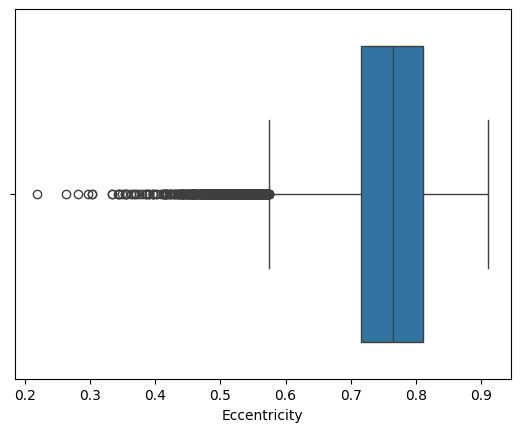

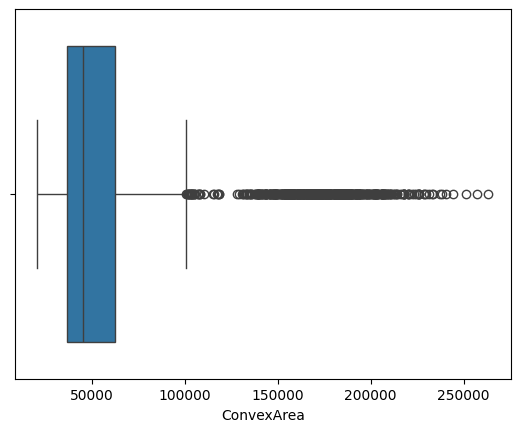

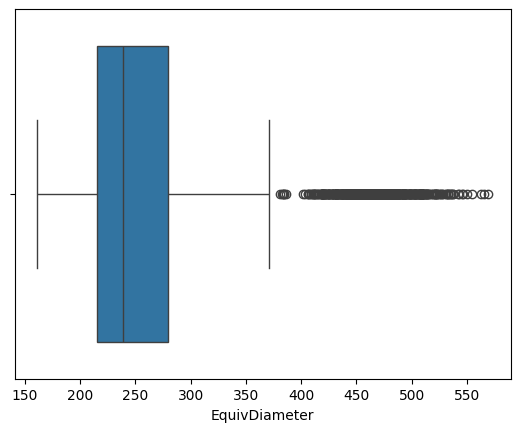

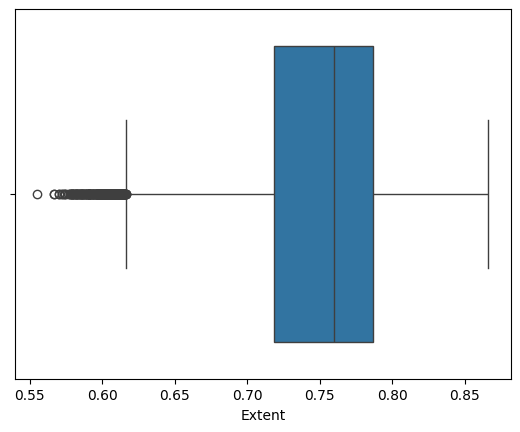

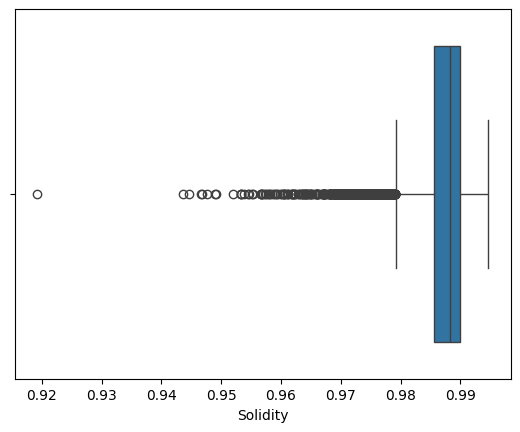

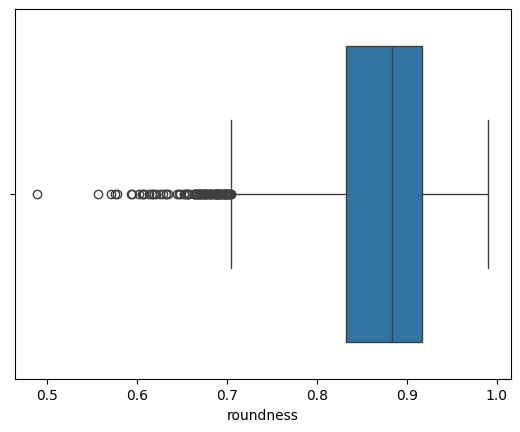

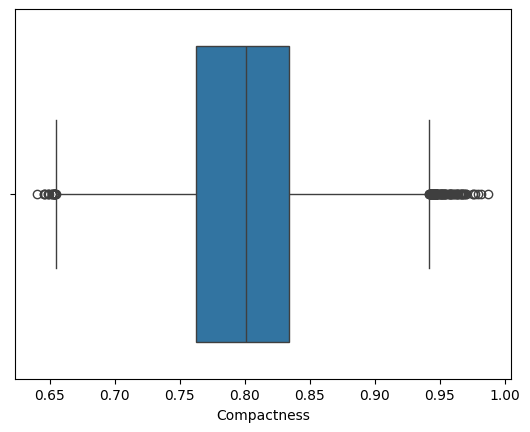

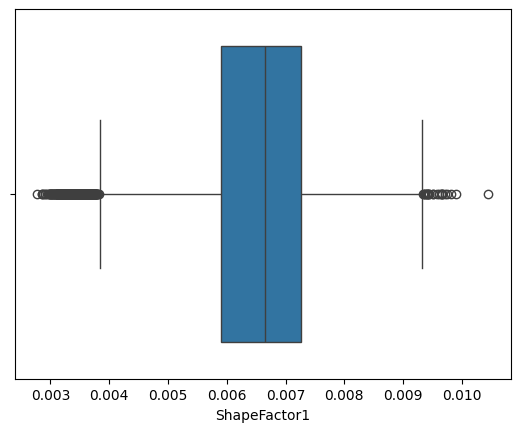

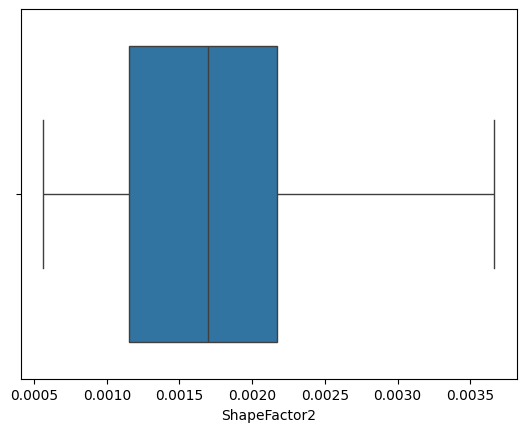

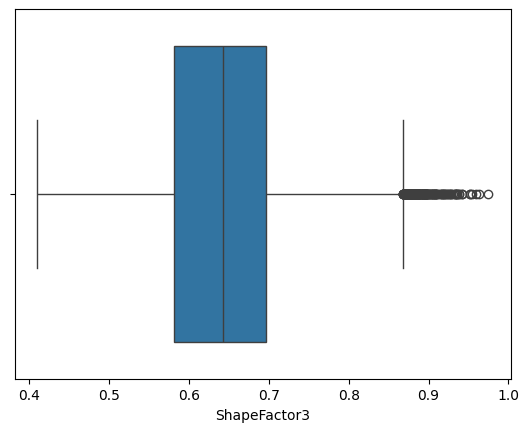

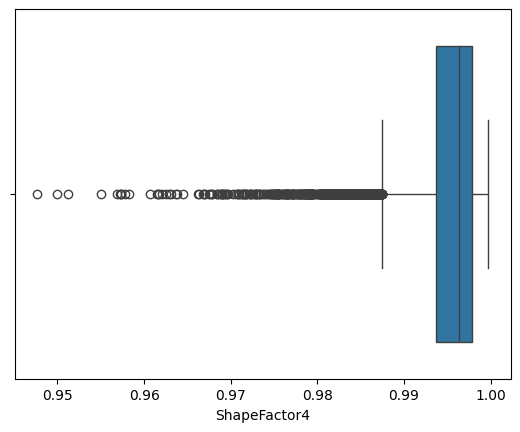

In [13]:
for i in df.columns[:-1]:
    sns.boxplot(data=df,x=df[i])
    plt.show()

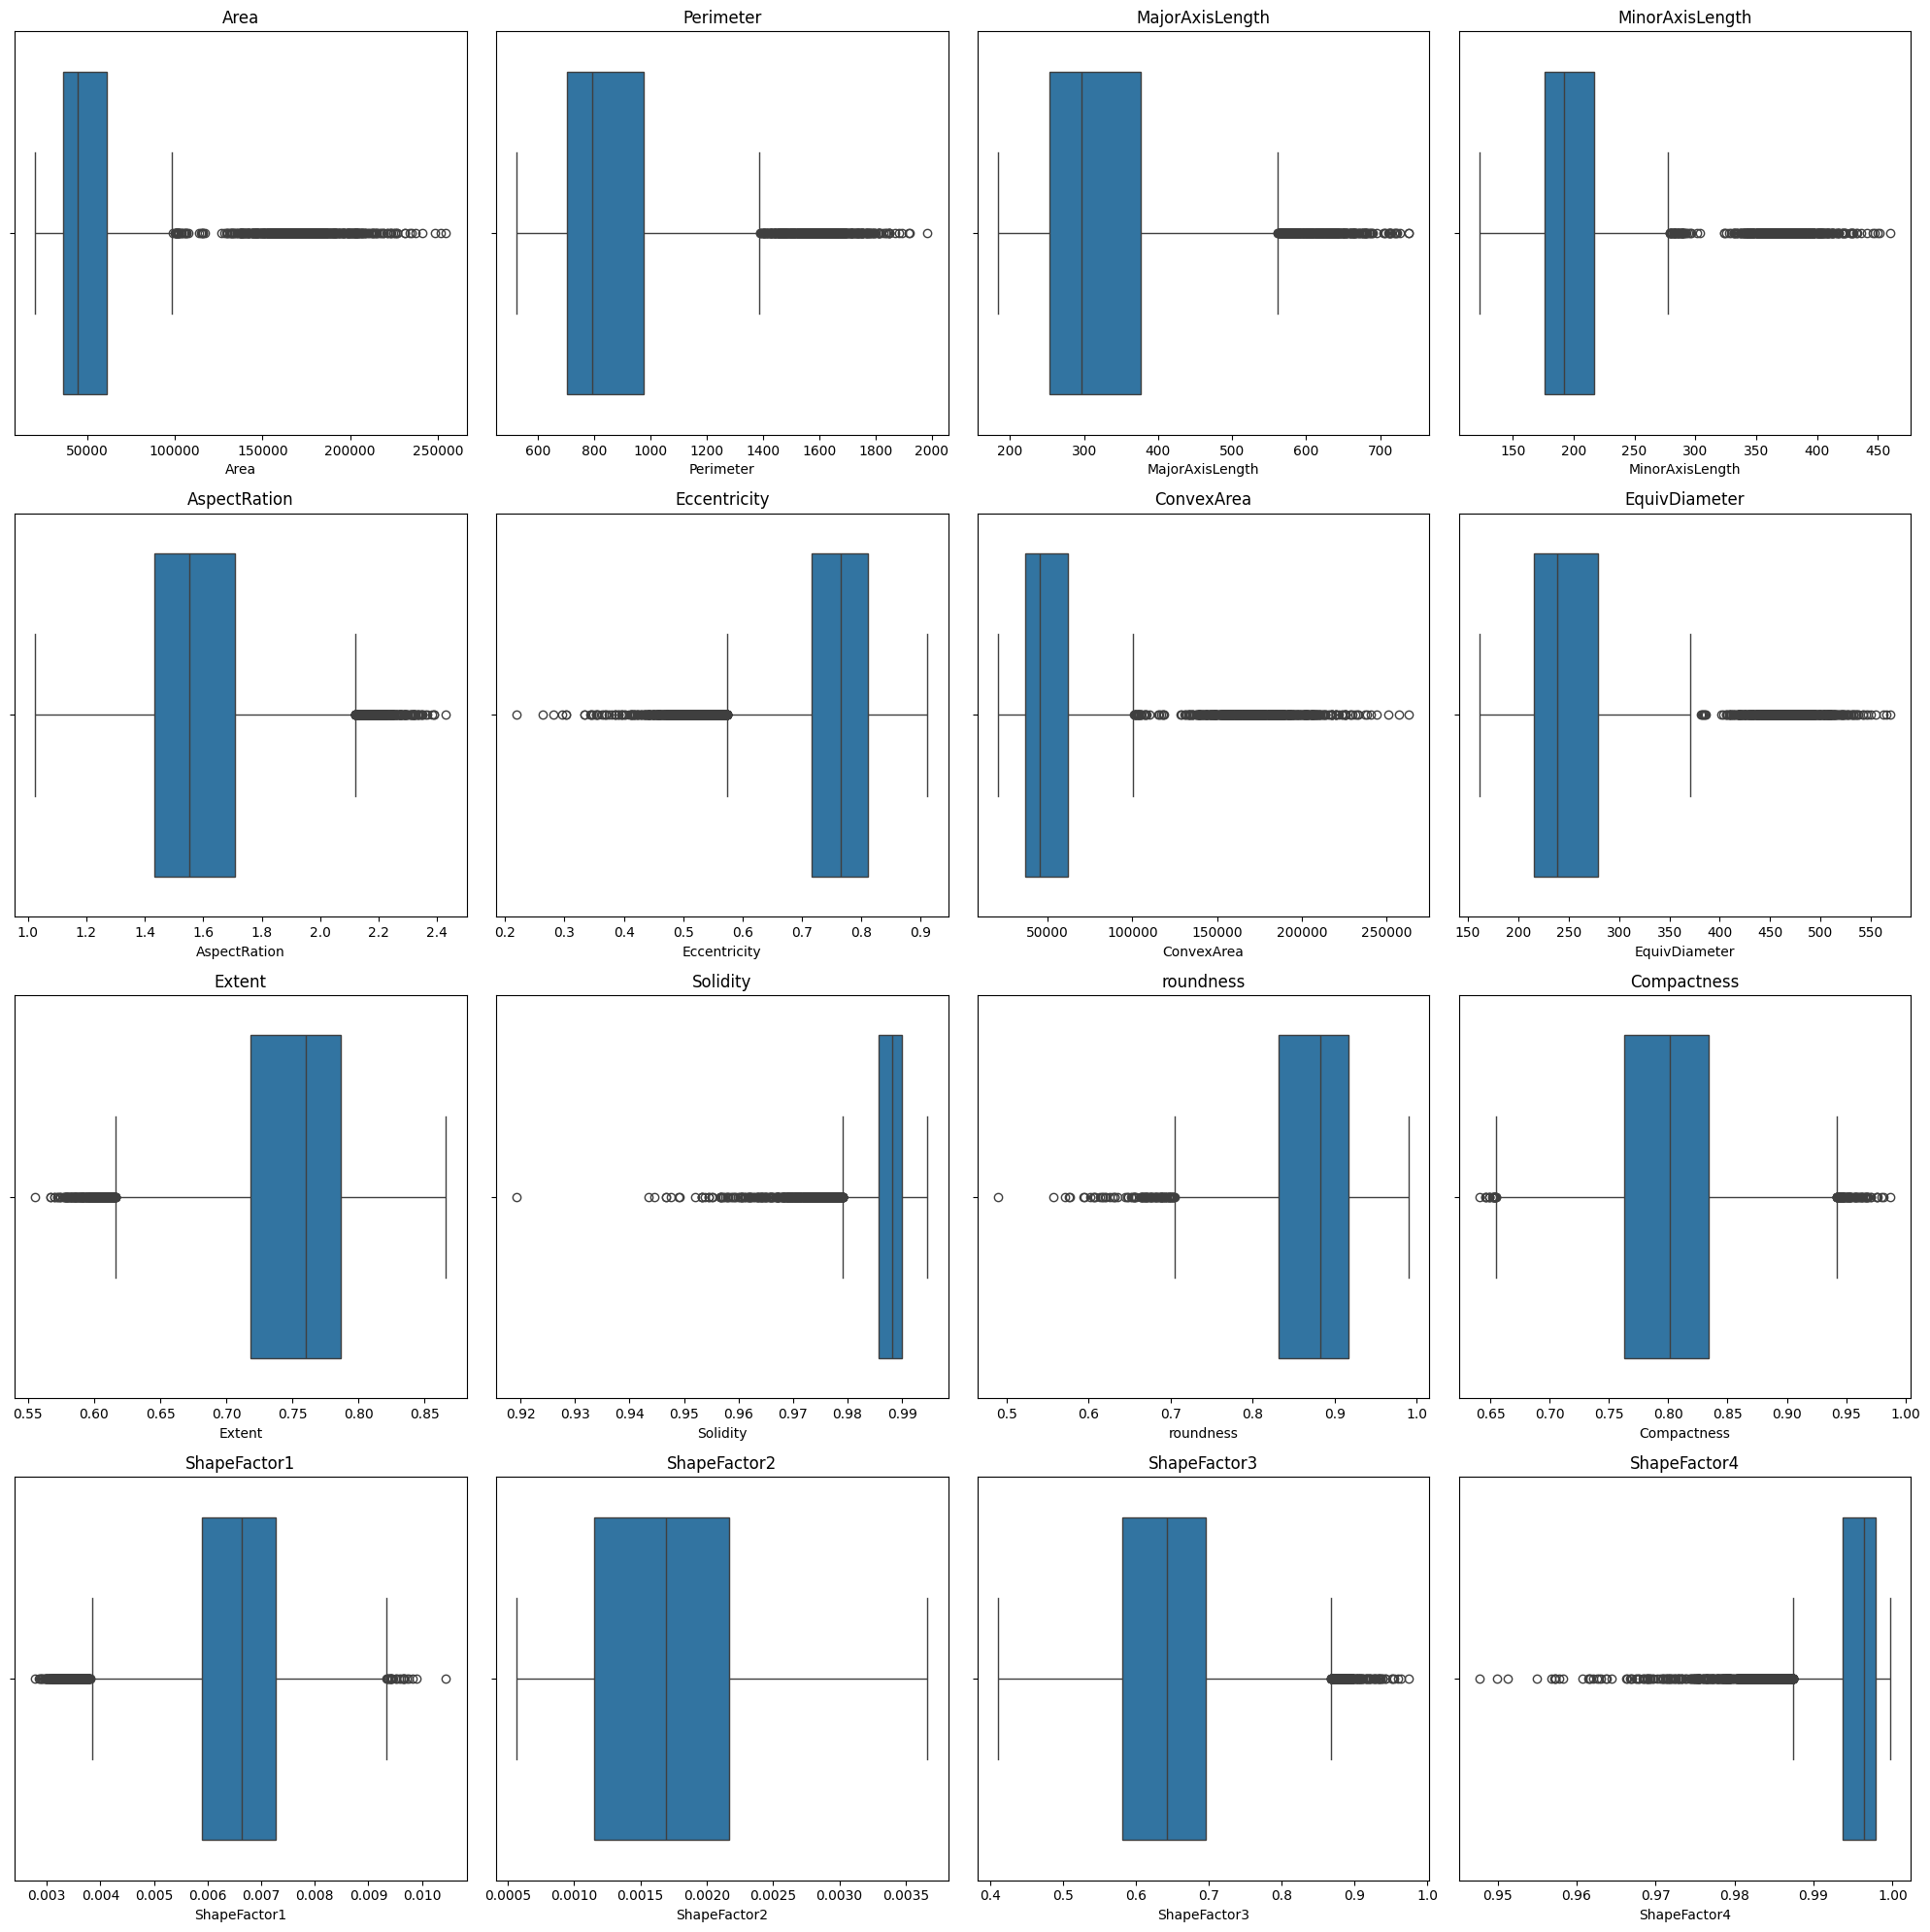

In [100]:
num_plots = len(data.columns) 
num_cols = 4
num_rows = (num_plots + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5*num_rows))

# Loop through each column (excluding the last column)
for i, column in enumerate(df.columns[:-1]):
    row_idx = i // num_cols
    col_idx = i % num_cols
    sns.boxplot(data=df, x=column, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(column)

# Hide empty subplots
for i in range(num_plots, num_rows * num_cols):
    row_idx = i // num_cols
    col_idx = i % num_cols
    fig.delaxes(axes[row_idx, col_idx])

plt.tight_layout()
plt.show()

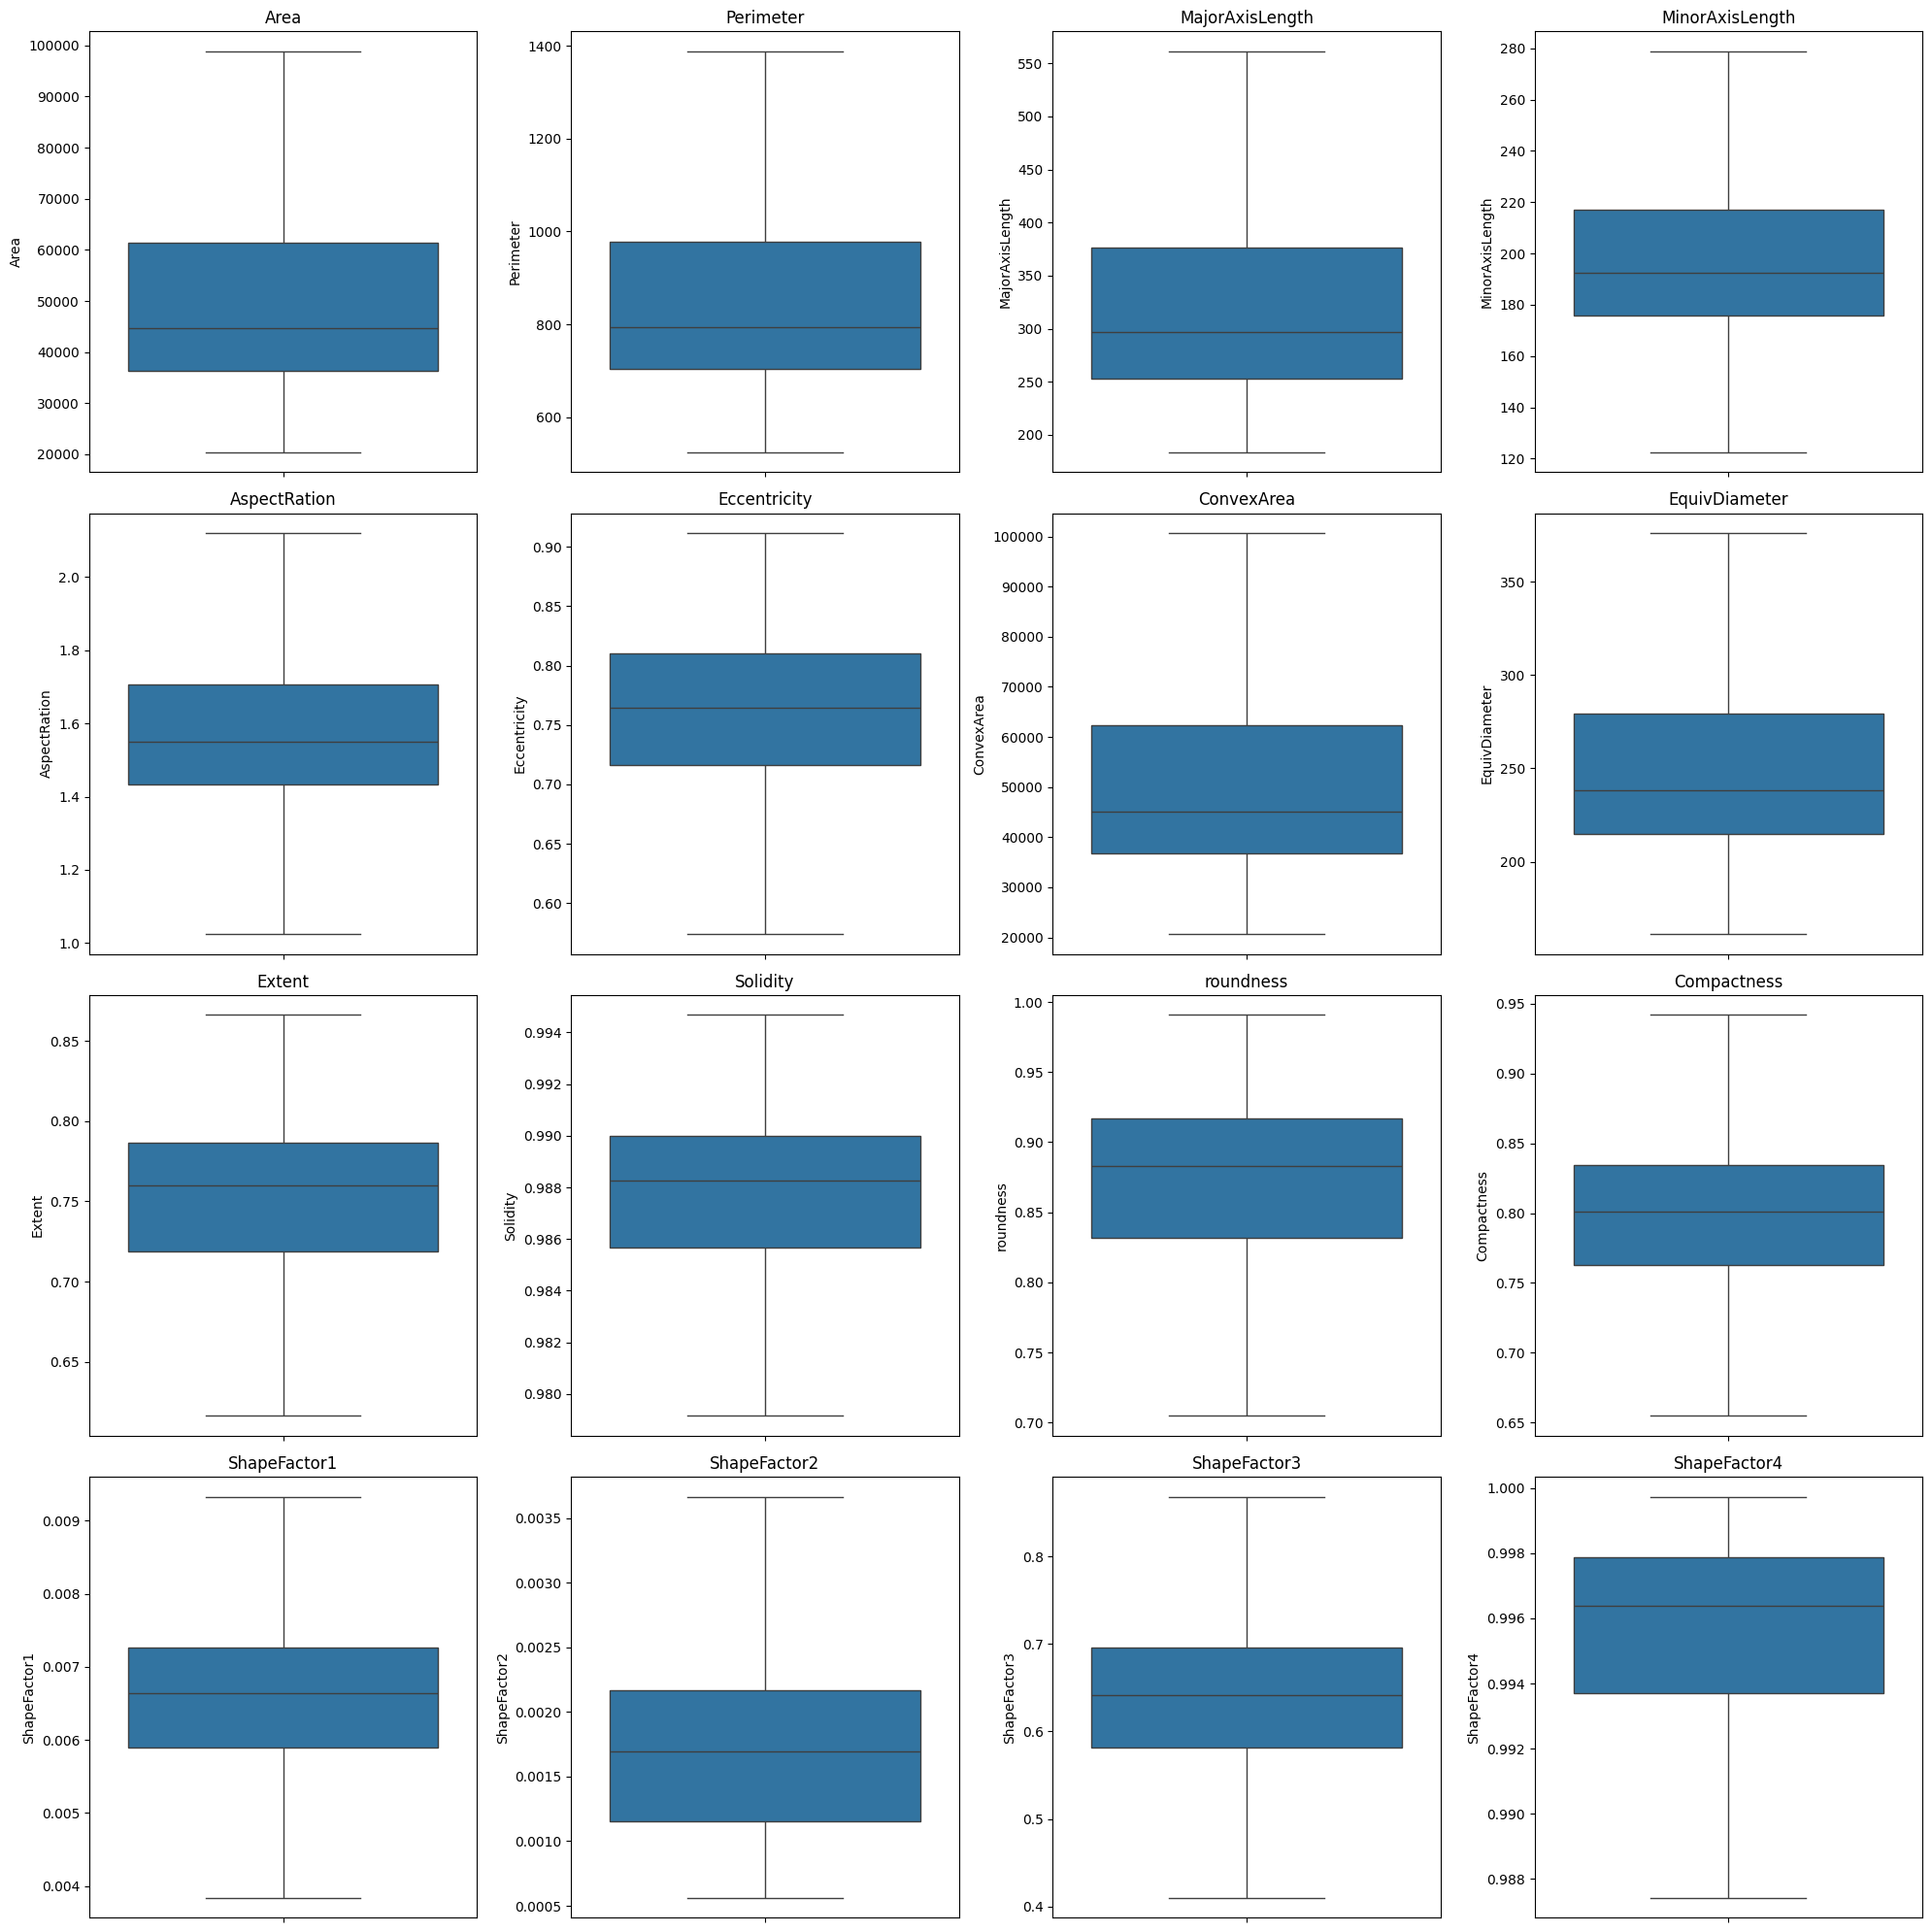

In [32]:
num_plots = 16
num_cols = 4
num_rows = (num_plots + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5*num_rows))

# Loop through each column and create boxplots
for i, column in enumerate(df.columns[:-1]):
    row_idx = i // num_cols
    col_idx = i % num_cols
    IQR = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_limit = df[column].quantile(0.75) + 1.5 * IQR
    lower_limit = df[column].quantile(0.25) - 1.5 * IQR
    df[column] = np.clip(df[column], lower_limit, upper_limit)
    
    # Plot boxplot
    sns.boxplot(df[column], ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(column)

# Hide empty subplots
for i in range(num_plots, num_rows * num_cols):
    row_idx = i // num_cols
    col_idx = i % num_cols
    fig.delaxes(axes[row_idx, col_idx])

plt.tight_layout()
plt.show()

In [33]:
df

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.574120     28715.0     190.141097  0.763923  0.988856   0.958027   
1          0.574120     29172.0     191.272751  0.783968  0.984986   0.887034   
2          0.574120     29690.0     193.410904  0.778113  0.989559   0.947849   
3          0.574120     30724.0     195.467062  0.782681  0.979156   0.903936   
4          0.574120     30417.0     195.896503  0.773098  0.990893   0.984877   
...             ...         ...            ...       ...       ...        ...   
13606      0.765002     42508.0     231.515799  0.714574  0.990331   0.916603   
13607      0.735702     42494.0     231.526798  0.799943  0.990752   0.922015   
13608      0.734065     42569.0     231.631261  0.729932  0.989899   0.918424   
13609      0.741055     42667.0     231.653247  0.705389  0.987813   0.907906   
13610      0.786693     42600.0     231.686223  0.788962  0.989648   0.888380   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0         0.913358      0.007332      0.003147      0.834222      0.998724   
1         0.941972      0.006979      0.003564      0.867978      0.998430   
2         0.908774      0.007244      0.003048      0.825871      0.999066   
3         0.928329      0.007017      0.003215      0.861794      0.994199   
4         0.941972      0.006697      0.003665      0.867978      0.999166   
...            ...           ...           ...           ...           ...   
13606     0.801865      0.006858      0.001749      0.642988      0.998385   
13607     0.822252      0.006688      0.001886      0.676099      0.998219   
13608     0.822730      0.006681      0.001888      0.676884      0.996767   
13609     0.817457      0.006724      0.001852      0.668237      0.995222   
13610     0.784997      0.007001      0.001640      0.616221      0.998180   

          Class  
0         SEKER  
1         SEKER  
2         SEKER  
3         SEKER  
4         SEKER  
...         ...  
13606  DERMASON  
13607  DERMASON  
13608  DERMASON  
13609  DERMASON  
13610  DERMASON  

[13611 rows x 17 columns]

In [40]:
label=LabelEncoder()
a=label.fit_transform(df["Class"])

In [41]:
df["Class"]=a

# feature seleaction 

from the above heat map i can see that area is directly to the convex area so we can remove the convex area

i can see that from the descriptive staistics the solidity range for all the beans are same

i can see that equdiameter is directly corelated to the area

In [49]:
df

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.574120     28715.0     190.141097  0.763923  0.988856   0.958027   
1          0.574120     29172.0     191.272751  0.783968  0.984986   0.887034   
2          0.574120     29690.0     193.410904  0.778113  0.989559   0.947849   
3          0.574120     30724.0     195.467062  0.782681  0.979156   0.903936   
4          0.574120     30417.0     195.896503  0.773098  0.990893   0.984877   
...             ...         ...            ...       ...       ...        ...   
13606      0.765002     42508.0     231.515799  0.714574  0.990331   0.916603   
13607      0.735702     42494.0     231.526798  0.799943  0.990752   0.922015   
13608      0.734065     42569.0     231.631261  0.729932  0.989899   0.918424   
13609      0.741055     42667.0     231.653247  0.705389  0.987813   0.907906   
13610      0.786693     42600.0     231.686223  0.788962  0.989648   0.888380   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0         0.913358      0.007332      0.003147      0.834222      0.998724   
1         0.941972      0.006979      0.003564      0.867978      0.998430   
2         0.908774      0.007244      0.003048      0.825871      0.999066   
3         0.928329      0.007017      0.003215      0.861794      0.994199   
4         0.941972      0.006697      0.003665      0.867978      0.999166   
...            ...           ...           ...           ...           ...   
13606     0.801865      0.006858      0.001749      0.642988      0.998385   
13607     0.822252      0.006688      0.001886      0.676099      0.998219   
13608     0.822730      0.006681      0.001888      0.676884      0.996767   
13609     0.817457      0.006724      0.001852      0.668237      0.995222   
13610     0.784997      0.007001      0.001640      0.616221      0.998180   

       Class  
0          5  
1          5  
2          5  
3          5  
4          5  
...      ...  
13606      3  
13607      3  
13608      3  
13609      3  
13610      3  

[13611 rows x 17 columns]

In [50]:
df.drop(["ConvexArea","Solidity","EquivDiameter","Compactness"],axis=1,inplace=True)

In [52]:
df

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity    Extent  roundness  ShapeFactor1  ShapeFactor2  \
0          0.574120  0.763923   0.958027      0.007332      0.003147   
1          0.574120  0.783968   0.887034      0.006979      0.003564   
2          0.574120  0.778113   0.947849      0.007244      0.003048   
3          0.574120  0.782681   0.903936      0.007017      0.003215   
4          0.574120  0.773098   0.984877      0.006697      0.003665   
...             ...       ...        ...           ...           ...   
13606      0.765002  0.714574   0.916603      0.006858      0.001749   
13607      0.735702  0.799943   0.922015      0.006688      0.001886   
13608      0.734065  0.729932   0.918424      0.006681      0.001888   
13609      0.741055  0.705389   0.907906      0.006724      0.001852   
13610      0.786693  0.788962   0.888380      0.007001      0.001640   

       ShapeFactor3  ShapeFactor4  Class  
0          0.834222      0.998724      5  
1          0.867978      0.998430      5  
2          0.825871      0.999066      5  
3          0.861794      0.994199      5  
4          0.867978      0.999166      5  
...             ...           ...    ...  
13606      0.642988      0.998385      3  
13607      0.676099      0.998219      3  
13608      0.676884      0.996767      3  
13609      0.668237      0.995222      3  
13610      0.616221      0.998180      3  

[13611 rows x 13 columns]

### Spliting the data into the feature variable and the class variable

In [53]:
fv=df.iloc[:,:-1]
cv=df.iloc[:,-1]

In [54]:
fv

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity    Extent  roundness  ShapeFactor1  ShapeFactor2  \
0          0.574120  0.763923   0.958027      0.007332      0.003147   
1          0.574120  0.783968   0.887034      0.006979      0.003564   
2          0.574120  0.778113   0.947849      0.007244      0.003048   
3          0.574120  0.782681   0.903936      0.007017      0.003215   
4          0.574120  0.773098   0.984877      0.006697      0.003665   
...             ...       ...        ...           ...           ...   
13606      0.765002  0.714574   0.916603      0.006858      0.001749   
13607      0.735702  0.799943   0.922015      0.006688      0.001886   
13608      0.734065  0.729932   0.918424      0.006681      0.001888   
13609      0.741055  0.705389   0.907906      0.006724      0.001852   
13610      0.786693  0.788962   0.888380      0.007001      0.001640   

       ShapeFactor3  ShapeFactor4  
0          0.834222      0.998724  
1          0.867978      0.998430  
2          0.825871      0.999066  
3          0.861794      0.994199  
4          0.867978      0.999166  
...             ...           ...  
13606      0.642988      0.998385  
13607      0.676099      0.998219  
13608      0.676884      0.996767  
13609      0.668237      0.995222  
13610      0.616221      0.998180  

[13611 rows x 12 columns]

In [55]:
cv

0        5
1        5
2        5
3        5
4        5
        ..
13606    3
13607    3
13608    3
13609    3
13610    3
Name: Class, Length: 13611, dtype: int32

In [56]:
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.1,random_state=10,stratify=cv)

In [57]:
x_trainf,x_cv,y_trainf,y_cv=train_test_split(x_train,y_train,test_size=0.1,random_state=10,stratify=y_train)

### Feature Scaling in Machine Learning: StandardScaler 

In [58]:
std=StandardScaler()
px_train=std.fit_transform(x_trainf)
px_cv=std.transform(x_cv)
px_test=std.transform(x_test)

### Finding the k value based on the dtrainf and d_cv

no of neighbours : 1
 
accuaracy train : 1.0

accuaracy : 0.8497959183673469
 

error : 0.15020408163265309
 


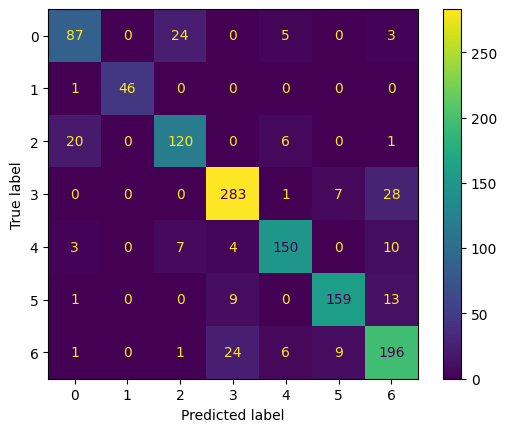

 
precision_score : [0.7699115  1.         0.78947368 0.884375   0.89285714 0.90857143
 0.78087649]
 
recall_score : [0.73109244 0.9787234  0.81632653 0.88714734 0.86206897 0.87362637
 0.82700422]
 
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       119
           1       1.00      0.98      0.99        47
           2       0.79      0.82      0.80       147
           3       0.88      0.89      0.89       319
           4       0.89      0.86      0.88       174
           5       0.91      0.87      0.89       182
           6       0.78      0.83      0.80       237

    accuracy                           0.85      1225
   macro avg       0.86      0.85      0.86      1225
weighted avg       0.85      0.85      0.85      1225

 
logloss : 5.413903855998007
 
 
log_loss dummy : 1.8346996197876575
 
****************************************************************************************************

no of neighbours : 3
 
accuara

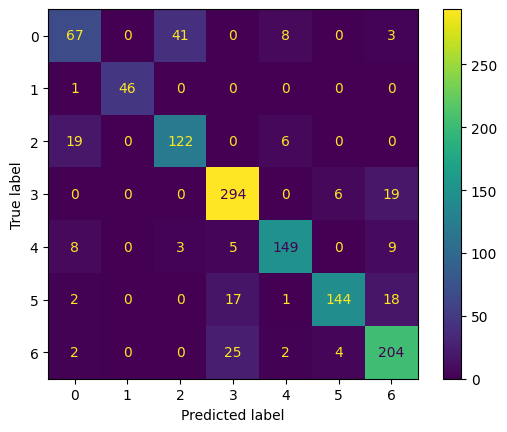

 
precision_score : [0.67676768 1.         0.73493976 0.86217009 0.89759036 0.93506494
 0.80632411]
 
recall_score : [0.56302521 0.9787234  0.82993197 0.92163009 0.85632184 0.79120879
 0.86075949]
 
              precision    recall  f1-score   support

           0       0.68      0.56      0.61       119
           1       1.00      0.98      0.99        47
           2       0.73      0.83      0.78       147
           3       0.86      0.92      0.89       319
           4       0.90      0.86      0.88       174
           5       0.94      0.79      0.86       182
           6       0.81      0.86      0.83       237

    accuracy                           0.84      1225
   macro avg       0.84      0.83      0.83      1225
weighted avg       0.84      0.84      0.84      1225

 
logloss : 2.3252825844788947
 
 
log_loss dummy : 1.8346996197876575
 
****************************************************************************************************

no of neighbours : 5
 
accuar

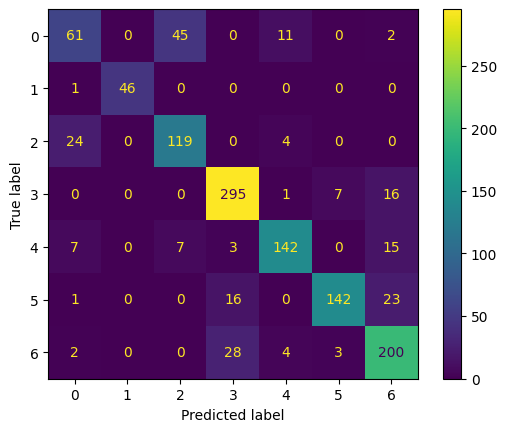

 
precision_score : [0.63541667 1.         0.69590643 0.8625731  0.87654321 0.93421053
 0.78125   ]
 
recall_score : [0.51260504 0.9787234  0.80952381 0.92476489 0.81609195 0.78021978
 0.84388186]
 
              precision    recall  f1-score   support

           0       0.64      0.51      0.57       119
           1       1.00      0.98      0.99        47
           2       0.70      0.81      0.75       147
           3       0.86      0.92      0.89       319
           4       0.88      0.82      0.85       174
           5       0.93      0.78      0.85       182
           6       0.78      0.84      0.81       237

    accuracy                           0.82      1225
   macro avg       0.83      0.81      0.81      1225
weighted avg       0.82      0.82      0.82      1225

 
logloss : 1.683962528050476
 
 
log_loss dummy : 1.8346996197876575
 
****************************************************************************************************

no of neighbours : 7
 
accuara

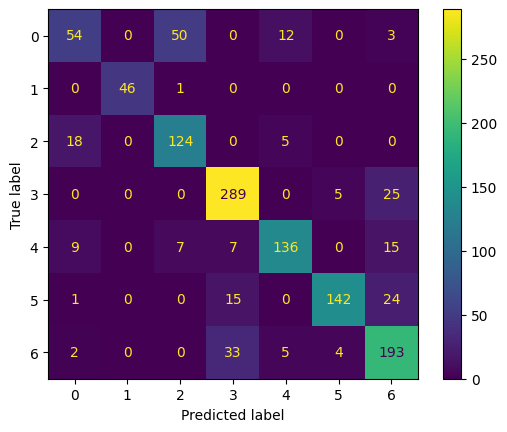

 
precision_score : [0.64285714 1.         0.68131868 0.84011628 0.86075949 0.94039735
 0.74230769]
 
recall_score : [0.45378151 0.9787234  0.84353741 0.90595611 0.7816092  0.78021978
 0.81434599]
 
              precision    recall  f1-score   support

           0       0.64      0.45      0.53       119
           1       1.00      0.98      0.99        47
           2       0.68      0.84      0.75       147
           3       0.84      0.91      0.87       319
           4       0.86      0.78      0.82       174
           5       0.94      0.78      0.85       182
           6       0.74      0.81      0.78       237

    accuracy                           0.80      1225
   macro avg       0.82      0.79      0.80      1225
weighted avg       0.81      0.80      0.80      1225

 
logloss : 1.4498288060971456
 
 
log_loss dummy : 1.8346996197876575
 
****************************************************************************************************

no of neighbours : 9
 
accuar

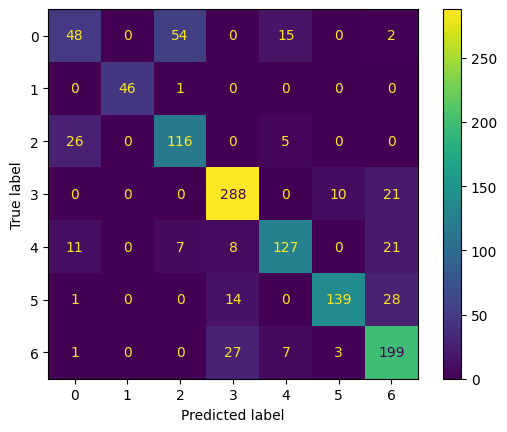

 
precision_score : [0.55172414 1.         0.65168539 0.85459941 0.82467532 0.91447368
 0.73431734]
 
recall_score : [0.40336134 0.9787234  0.78911565 0.90282132 0.72988506 0.76373626
 0.83966245]
 
              precision    recall  f1-score   support

           0       0.55      0.40      0.47       119
           1       1.00      0.98      0.99        47
           2       0.65      0.79      0.71       147
           3       0.85      0.90      0.88       319
           4       0.82      0.73      0.77       174
           5       0.91      0.76      0.83       182
           6       0.73      0.84      0.78       237

    accuracy                           0.79      1225
   macro avg       0.79      0.77      0.78      1225
weighted avg       0.79      0.79      0.78      1225

 
logloss : 1.1320083797295186
 
 
log_loss dummy : 1.8346996197876575
 
****************************************************************************************************

no of neighbours : 11
 
accua

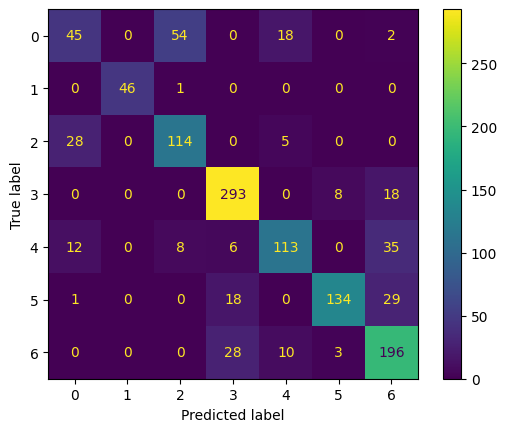

 
precision_score : [0.52325581 1.         0.6440678  0.84927536 0.7739726  0.92413793
 0.7       ]
 
recall_score : [0.37815126 0.9787234  0.7755102  0.9184953  0.64942529 0.73626374
 0.82700422]
 
              precision    recall  f1-score   support

           0       0.52      0.38      0.44       119
           1       1.00      0.98      0.99        47
           2       0.64      0.78      0.70       147
           3       0.85      0.92      0.88       319
           4       0.77      0.65      0.71       174
           5       0.92      0.74      0.82       182
           6       0.70      0.83      0.76       237

    accuracy                           0.77      1225
   macro avg       0.77      0.75      0.76      1225
weighted avg       0.77      0.77      0.76      1225

 
logloss : 1.026101687139419
 
 
log_loss dummy : 1.8346996197876575
 
****************************************************************************************************

no of neighbours : 13
 
accuar

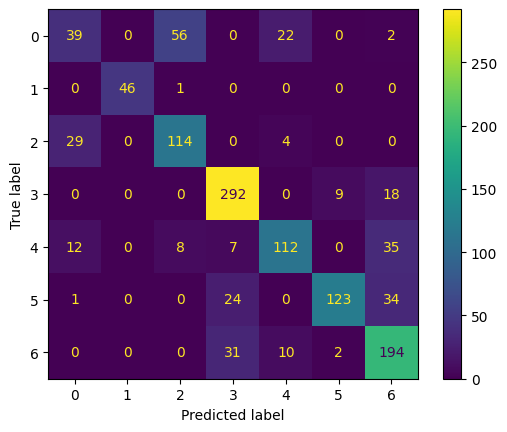

 
precision_score : [0.48148148 1.         0.63687151 0.82485876 0.75675676 0.91791045
 0.68551237]
 
recall_score : [0.32773109 0.9787234  0.7755102  0.9153605  0.64367816 0.67582418
 0.8185654 ]
 
              precision    recall  f1-score   support

           0       0.48      0.33      0.39       119
           1       1.00      0.98      0.99        47
           2       0.64      0.78      0.70       147
           3       0.82      0.92      0.87       319
           4       0.76      0.64      0.70       174
           5       0.92      0.68      0.78       182
           6       0.69      0.82      0.75       237

    accuracy                           0.75      1225
   macro avg       0.76      0.73      0.74      1225
weighted avg       0.75      0.75      0.74      1225

 
logloss : 0.945905538216687
 
 
log_loss dummy : 1.8346996197876575
 
****************************************************************************************************

no of neighbours : 15
 
accuar

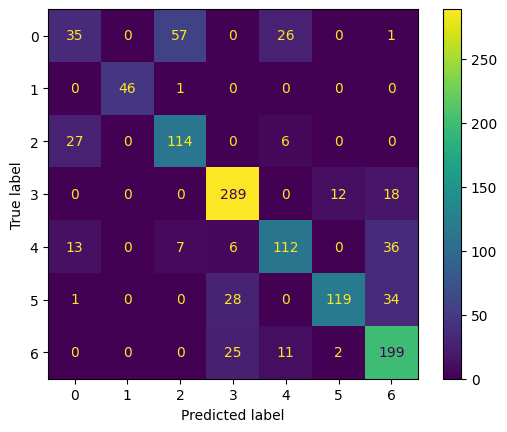

 
precision_score : [0.46052632 1.         0.63687151 0.83045977 0.72258065 0.89473684
 0.69097222]
 
recall_score : [0.29411765 0.9787234  0.7755102  0.90595611 0.64367816 0.65384615
 0.83966245]
 
              precision    recall  f1-score   support

           0       0.46      0.29      0.36       119
           1       1.00      0.98      0.99        47
           2       0.64      0.78      0.70       147
           3       0.83      0.91      0.87       319
           4       0.72      0.64      0.68       174
           5       0.89      0.65      0.76       182
           6       0.69      0.84      0.76       237

    accuracy                           0.75      1225
   macro avg       0.75      0.73      0.73      1225
weighted avg       0.75      0.75      0.74      1225

 
logloss : 0.9446509212406085
 
 
log_loss dummy : 1.8346996197876575
 
****************************************************************************************************

no of neighbours : 17
 
accua

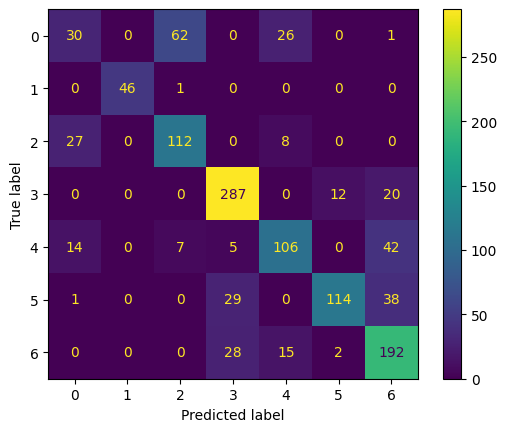

 
precision_score : [0.41666667 1.         0.61538462 0.82234957 0.68387097 0.890625
 0.6552901 ]
 
recall_score : [0.25210084 0.9787234  0.76190476 0.89968652 0.6091954  0.62637363
 0.81012658]
 
              precision    recall  f1-score   support

           0       0.42      0.25      0.31       119
           1       1.00      0.98      0.99        47
           2       0.62      0.76      0.68       147
           3       0.82      0.90      0.86       319
           4       0.68      0.61      0.64       174
           5       0.89      0.63      0.74       182
           6       0.66      0.81      0.72       237

    accuracy                           0.72      1225
   macro avg       0.73      0.71      0.71      1225
weighted avg       0.72      0.72      0.71      1225

 
logloss : 0.9400443138405687
 
 
log_loss dummy : 1.8346996197876575
 
****************************************************************************************************

no of neighbours : 19
 
accuara

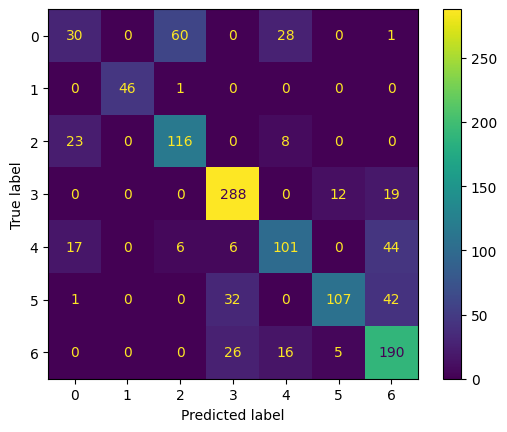

 
precision_score : [0.42253521 1.         0.63387978 0.81818182 0.66013072 0.86290323
 0.64189189]
 
recall_score : [0.25210084 0.9787234  0.78911565 0.90282132 0.58045977 0.58791209
 0.80168776]
 
              precision    recall  f1-score   support

           0       0.42      0.25      0.32       119
           1       1.00      0.98      0.99        47
           2       0.63      0.79      0.70       147
           3       0.82      0.90      0.86       319
           4       0.66      0.58      0.62       174
           5       0.86      0.59      0.70       182
           6       0.64      0.80      0.71       237

    accuracy                           0.72      1225
   macro avg       0.72      0.70      0.70      1225
weighted avg       0.71      0.72      0.71      1225

 
logloss : 0.9097212388371554
 
 
log_loss dummy : 1.8346996197876575
 
****************************************************************************************************

no of neighbours : 21
 
accua

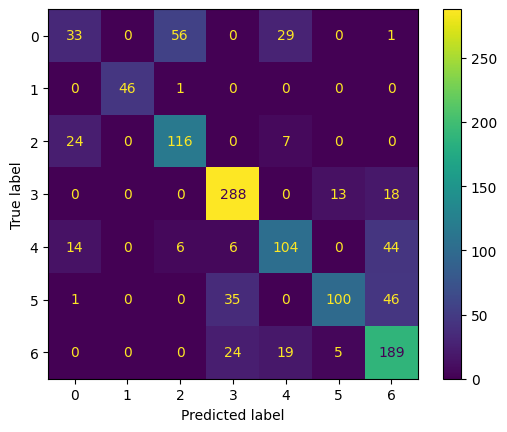

 
precision_score : [0.45833333 1.         0.64804469 0.81586402 0.65408805 0.84745763
 0.63422819]
 
recall_score : [0.27731092 0.9787234  0.78911565 0.90282132 0.59770115 0.54945055
 0.79746835]
 
              precision    recall  f1-score   support

           0       0.46      0.28      0.35       119
           1       1.00      0.98      0.99        47
           2       0.65      0.79      0.71       147
           3       0.82      0.90      0.86       319
           4       0.65      0.60      0.62       174
           5       0.85      0.55      0.67       182
           6       0.63      0.80      0.71       237

    accuracy                           0.72      1225
   macro avg       0.72      0.70      0.70      1225
weighted avg       0.71      0.72      0.70      1225

 
logloss : 0.9038109390872345
 
 
log_loss dummy : 1.8346996197876575
 
****************************************************************************************************

no of neighbours : 23
 
accua

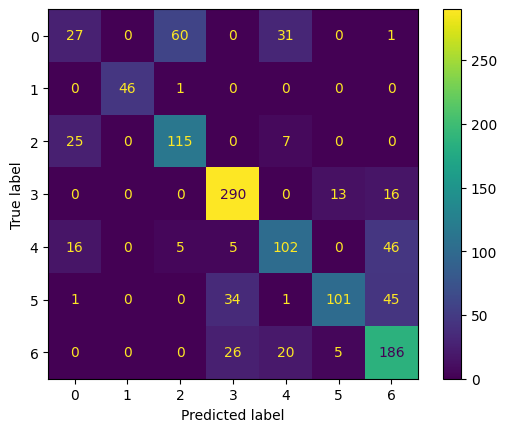

 
precision_score : [0.39130435 1.         0.63535912 0.81690141 0.63354037 0.8487395
 0.63265306]
 
recall_score : [0.22689076 0.9787234  0.78231293 0.90909091 0.5862069  0.55494505
 0.78481013]
 
              precision    recall  f1-score   support

           0       0.39      0.23      0.29       119
           1       1.00      0.98      0.99        47
           2       0.64      0.78      0.70       147
           3       0.82      0.91      0.86       319
           4       0.63      0.59      0.61       174
           5       0.85      0.55      0.67       182
           6       0.63      0.78      0.70       237

    accuracy                           0.71      1225
   macro avg       0.71      0.69      0.69      1225
weighted avg       0.70      0.71      0.70      1225

 
logloss : 0.8924082359316066
 
 
log_loss dummy : 1.8346996197876575
 
****************************************************************************************************

no of neighbours : 25
 
accuar

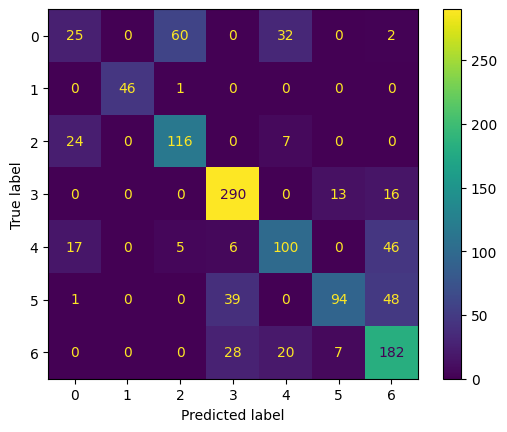

 
precision_score : [0.37313433 1.         0.63736264 0.79889807 0.62893082 0.8245614
 0.61904762]
 
recall_score : [0.21008403 0.9787234  0.78911565 0.90909091 0.57471264 0.51648352
 0.76793249]
 
              precision    recall  f1-score   support

           0       0.37      0.21      0.27       119
           1       1.00      0.98      0.99        47
           2       0.64      0.79      0.71       147
           3       0.80      0.91      0.85       319
           4       0.63      0.57      0.60       174
           5       0.82      0.52      0.64       182
           6       0.62      0.77      0.69       237

    accuracy                           0.70      1225
   macro avg       0.70      0.68      0.68      1225
weighted avg       0.69      0.70      0.68      1225

 
logloss : 0.8794946369586336
 
 
log_loss dummy : 1.8346996197876575
 
****************************************************************************************************

no of neighbours : 27
 
accuar

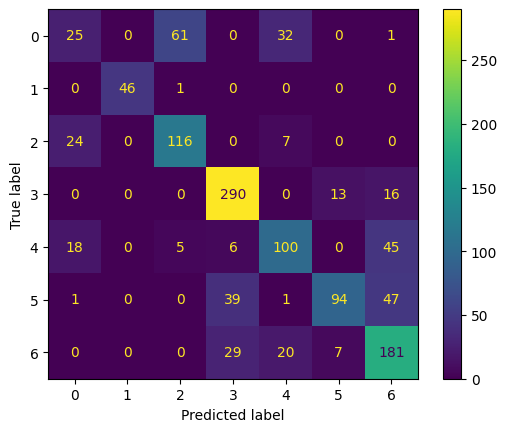

 
precision_score : [0.36764706 1.         0.63387978 0.7967033  0.625      0.8245614
 0.62413793]
 
recall_score : [0.21008403 0.9787234  0.78911565 0.90909091 0.57471264 0.51648352
 0.76371308]
 
              precision    recall  f1-score   support

           0       0.37      0.21      0.27       119
           1       1.00      0.98      0.99        47
           2       0.63      0.79      0.70       147
           3       0.80      0.91      0.85       319
           4       0.62      0.57      0.60       174
           5       0.82      0.52      0.64       182
           6       0.62      0.76      0.69       237

    accuracy                           0.70      1225
   macro avg       0.70      0.68      0.68      1225
weighted avg       0.69      0.70      0.68      1225

 
logloss : 0.8901366984225116
 
 
log_loss dummy : 1.8346996197876575
 
****************************************************************************************************

no of neighbours : 29
 
accuar

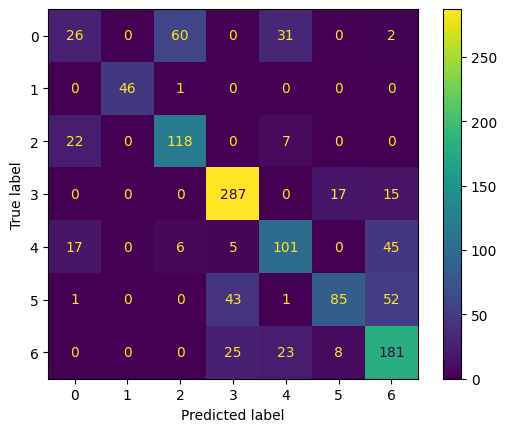

 
precision_score : [0.39393939 1.         0.63783784 0.79722222 0.6196319  0.77272727
 0.61355932]
 
recall_score : [0.21848739 0.9787234  0.80272109 0.89968652 0.58045977 0.46703297
 0.76371308]
 
              precision    recall  f1-score   support

           0       0.39      0.22      0.28       119
           1       1.00      0.98      0.99        47
           2       0.64      0.80      0.71       147
           3       0.80      0.90      0.85       319
           4       0.62      0.58      0.60       174
           5       0.77      0.47      0.58       182
           6       0.61      0.76      0.68       237

    accuracy                           0.69      1225
   macro avg       0.69      0.67      0.67      1225
weighted avg       0.68      0.69      0.67      1225

 
logloss : 0.8769737559218076
 
 
log_loss dummy : 1.8346996197876575
 
****************************************************************************************************



In [59]:
k=[]
a=[]
a_train=[]
e=[]
p=[]
r=[]
l=[]
l_d=[]
for i in range(1,30,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    model=knn.fit(x_trainf,y_trainf)
    predict_train=model.predict(x_trainf)
    a_train.append(accuracy_score(y_trainf,predict_train))
    
    predicted=model.predict(x_cv)
    print("no of neighbours :",i)
    print(" ")
    k.append(i)
    print("accuaracy train :",accuracy_score(y_trainf,predict_train))
    print("")
    a.append(accuracy_score(y_cv,predicted))
    print("accuaracy :",accuracy_score(y_cv,predicted))
    print(" ")
    print("")
    e.append(1-accuracy_score(y_cv,predicted))
    print("error :",1-accuracy_score(y_cv,predicted))
    print(" ")
    cm=ConfusionMatrixDisplay(confusion_matrix(y_cv,predicted,labels=model.classes_))
    cm.plot()
    plt.show()
    print(" ")
    p.append(precision_score(y_cv,predicted,average=None))
    print("precision_score :",precision_score(y_cv,predicted,average=None))
    print(" ") 
    r.append(recall_score(y_cv,predicted,average=None))
    print("recall_score :",recall_score(y_cv,predicted,average=None))
    print(" ")
    print(classification_report(y_cv,predicted))
    print(" ")
    predicted_probablity=model.predict_proba(x_cv)
    l.append(log_loss(y_cv,predicted_probablity))
    print("logloss :",log_loss(y_cv,predicted_probablity))
    print(" ") 
    dc=DummyClassifier()
    dc_model=dc.fit(x_train,y_train)
    dc_predit=dc_model.predict_proba(x_cv)
    l_d.append(log_loss(y_cv,dc_predit))
    print(" ")
    print("log_loss dummy :",log_loss(y_cv,dc_predit))
    print(" ")
    print("*"*100)
    print("")


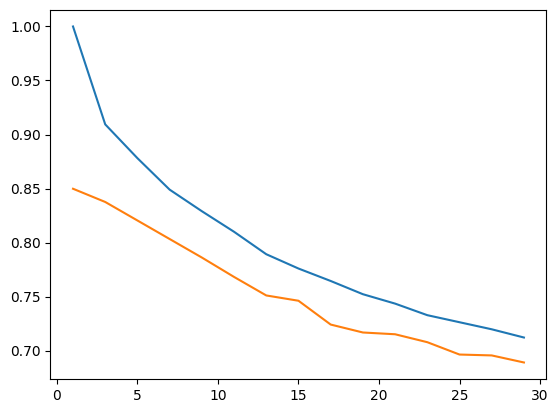

In [60]:
plt.plot(k,a_train)
plt.plot(k,a)
plt.show()

accuracy score :  0.8237885462555066

error score : 0.17621145374449343



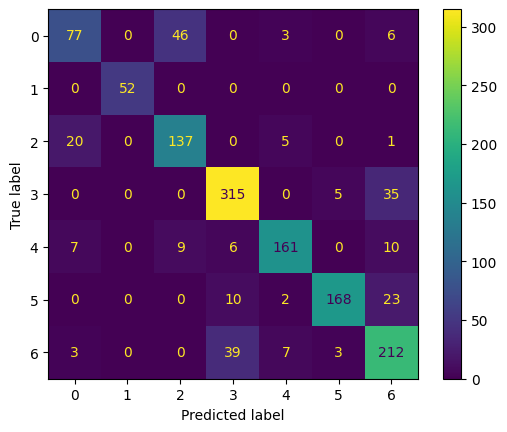

recall score [0.58333333 1.         0.8404908  0.88732394 0.83419689 0.82758621
 0.8030303 ]

precision score : [0.71962617 1.         0.71354167 0.85135135 0.90449438 0.95454545
 0.73867596]

              precision    recall  f1-score   support

           0       0.72      0.58      0.64       132
           1       1.00      1.00      1.00        52
           2       0.71      0.84      0.77       163
           3       0.85      0.89      0.87       355
           4       0.90      0.83      0.87       193
           5       0.95      0.83      0.89       203
           6       0.74      0.80      0.77       264

    accuracy                           0.82      1362
   macro avg       0.84      0.83      0.83      1362
weighted avg       0.83      0.82      0.82      1362

precision score : 2.9284165675745806


In [61]:
knn=KNeighborsClassifier(n_neighbors=3)
model=knn.fit(x_trainf,y_trainf)
predicted=model.predict(x_test)
print("accuracy score : ",accuracy_score(y_test,predicted))
print("")
print("error score :",1-accuracy_score(y_test,predicted))
print("")
cm=ConfusionMatrixDisplay(confusion_matrix(y_test,predicted,labels=model.classes_))
cm.plot()
plt.show()
print("recall score",recall_score(y_test,predicted,average=None))
print("")
print("precision score :",precision_score(y_test,predicted,average=None))
print("")
print(classification_report(y_test,predicted))
predicted=model.predict_proba(x_test)
print("precision score :",log_loss(y_test,predicted))



In [62]:
kf=KFold(n_splits=3)

K_value 1


avg_accuracy :  0.8234141562576537

avg_err :  0.17658584374234632
 


<Figure size 2000x800 with 0 Axes>

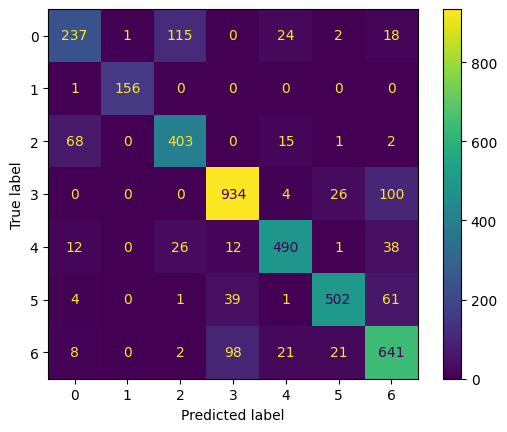

 
recall_score :  0.8251404425874777
 
precision Score :  0.8357553113955363
 
log loss :  6.364798945273935
 
log loss_dummy :  1.834217157999518
 
****************************************************************************************************
K_value 3


avg_accuracy :  0.8126377663482733

avg_err :  0.18736223365172666
 


<Figure size 2000x800 with 0 Axes>

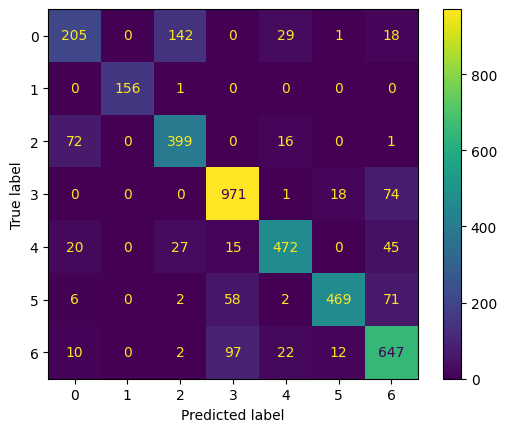

 
recall_score :  0.8063116220104359
 
precision Score :  0.822837318654935
 
log loss :  2.9567680815923403
 
log loss_dummy :  1.834217157999518
 
****************************************************************************************************
K_value 5


avg_accuracy :  0.7913299044819985

avg_err :  0.20867009551800145
 


<Figure size 2000x800 with 0 Axes>

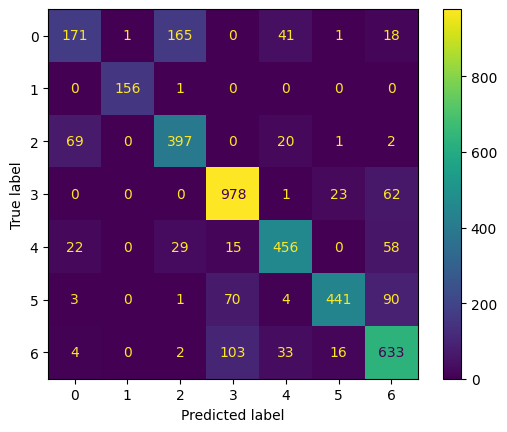

 
recall_score :  0.7811994173128243
 
precision Score :  0.8016457200759577
 
log loss :  2.1476688325288786
 
log loss_dummy :  1.834217157999518
 
****************************************************************************************************
K_value 7


avg_accuracy :  0.7704302392032002

avg_err :  0.22956976079679972
 


<Figure size 2000x800 with 0 Axes>

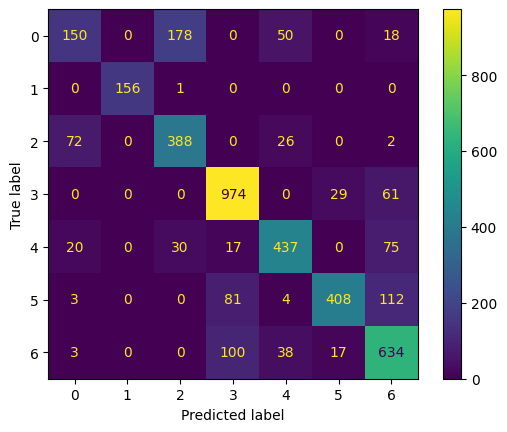

 
recall_score :  0.7586233970709605
 
precision Score :  0.7813774339257245
 
log loss :  1.769392442446806
 
log loss_dummy :  1.834217157999518
 
****************************************************************************************************
K_value 9


avg_accuracy :  0.7538574577516531

avg_err :  0.24614254224834684
 


<Figure size 2000x800 with 0 Axes>

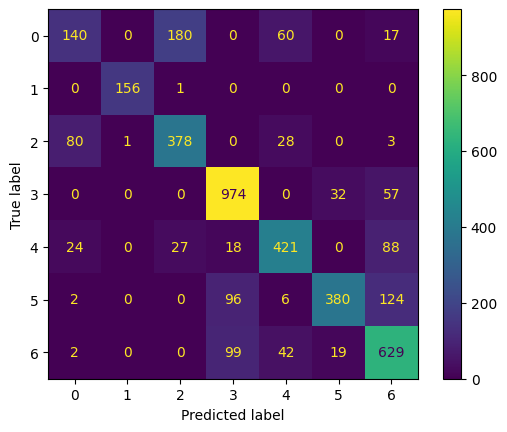

 
recall_score :  0.7408418559540463
 
precision Score :  0.763939091867034
 
log loss :  1.524297957776321
 
log loss_dummy :  1.834217157999518
 
****************************************************************************************************
K_value 11


avg_accuracy :  0.7382643481100498

avg_err :  0.2617356518899502
 


<Figure size 2000x800 with 0 Axes>

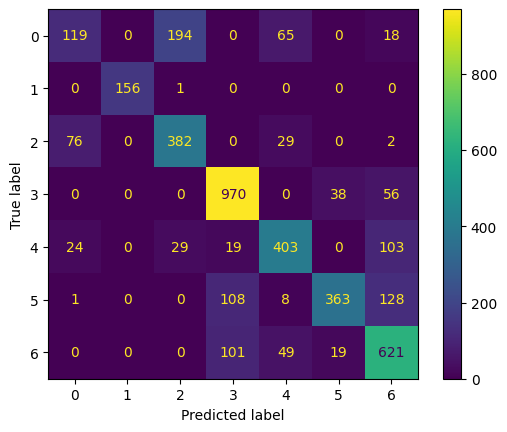

 
recall_score :  0.7242331156637712
 
precision Score :  0.7483810055833919
 
log loss :  1.3938582795179772
 
log loss_dummy :  1.834217157999518
 
****************************************************************************************************
K_value 13


avg_accuracy :  0.7229977957384276

avg_err :  0.27700220426157235
 


<Figure size 2000x800 with 0 Axes>

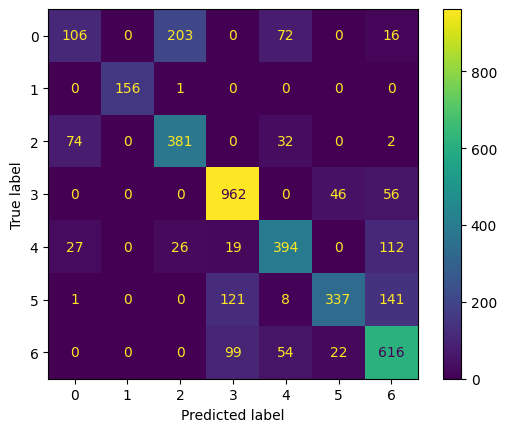

 
recall_score :  0.7088690776668566
 
precision Score :  0.7315705712896279
 
log loss :  1.314407970762016
 
log loss_dummy :  1.834217157999518
 
****************************************************************************************************
K_value 15


avg_accuracy :  0.7132827169564863

avg_err :  0.28671728304351374
 


<Figure size 2000x800 with 0 Axes>

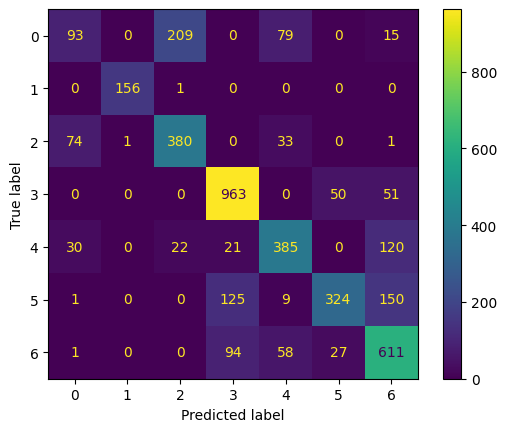

 
recall_score :  0.6978126778560305
 
precision Score :  0.7171294355020862
 
log loss :  1.2567635565850492
 
log loss_dummy :  1.834217157999518
 
****************************************************************************************************
K_value 17


avg_accuracy :  0.7000571475222467

avg_err :  0.2999428524777533
 


<Figure size 2000x800 with 0 Axes>

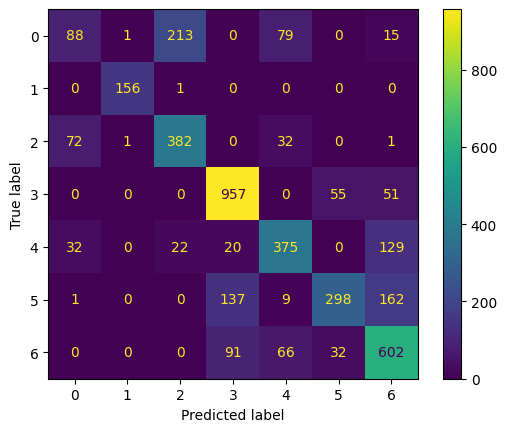

 
recall_score :  0.6855606495824125
 
precision Score :  0.7029346670766715
 
log loss :  1.2208601145888027
 
log loss_dummy :  1.834217157999518
 
****************************************************************************************************
K_value 19


avg_accuracy :  0.6930361662176504

avg_err :  0.3069638337823496
 


<Figure size 2000x800 with 0 Axes>

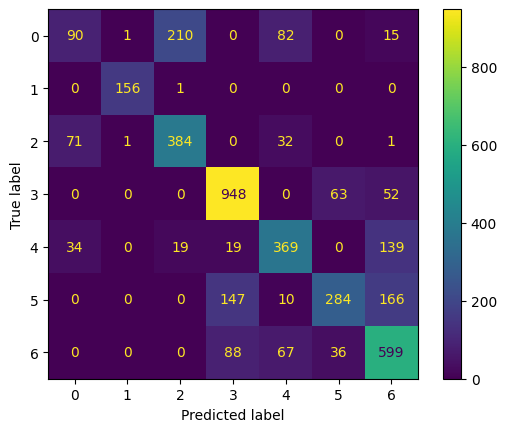

 
recall_score :  0.6801200749920688
 
precision Score :  0.6969371596130948
 
log loss :  1.1911573583137398
 
log loss_dummy :  1.834217157999518
 
****************************************************************************************************
K_value 21


avg_accuracy :  0.6860151849130541

avg_err :  0.31398481508694587
 


<Figure size 2000x800 with 0 Axes>

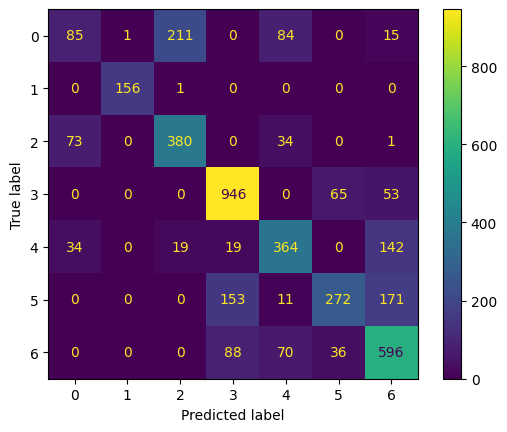

 
recall_score :  0.6729986106003335
 
precision Score :  0.6896463663523
 
log loss :  1.1769580436364786
 
log loss_dummy :  1.834217157999518
 
****************************************************************************************************
K_value 23


avg_accuracy :  0.6831578088007184

avg_err :  0.31684219119928153
 


<Figure size 2000x800 with 0 Axes>

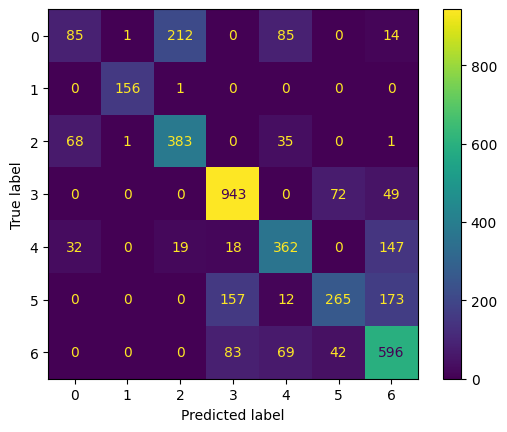

 
recall_score :  0.6706807614682132
 
precision Score :  0.6862081033493774
 
log loss :  1.1395032154701266
 
log loss_dummy :  1.834217157999518
 
****************************************************************************************************
K_value 25


avg_accuracy :  0.6783410890684953

avg_err :  0.3216589109315046
 


<Figure size 2000x800 with 0 Axes>

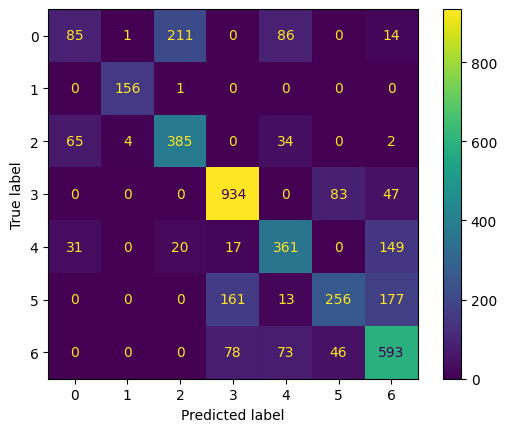

 
recall_score :  0.667242208283678
 
precision Score :  0.6794791869624268
 
log loss :  1.1123471075252038
 
log loss_dummy :  1.834217157999518
 
****************************************************************************************************
K_value 27


avg_accuracy :  0.6697689607314882

avg_err :  0.3302310392685118
 


<Figure size 2000x800 with 0 Axes>

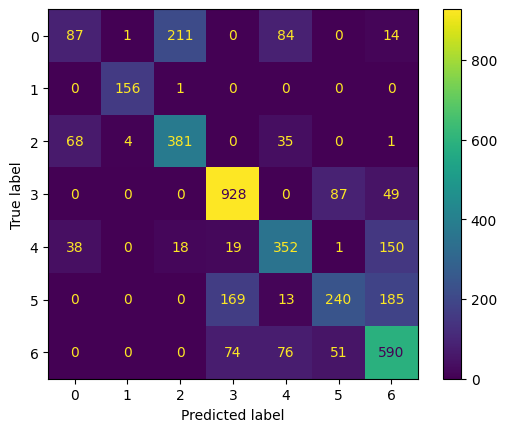

 
recall_score :  0.659779921987875
 
precision Score :  0.6696309007696621
 
log loss :  1.0923289685809705
 
log loss_dummy :  1.834217157999518
 
****************************************************************************************************
K_value 29


avg_accuracy :  0.6638909298718263

avg_err :  0.33610907012817376
 


<Figure size 2000x800 with 0 Axes>

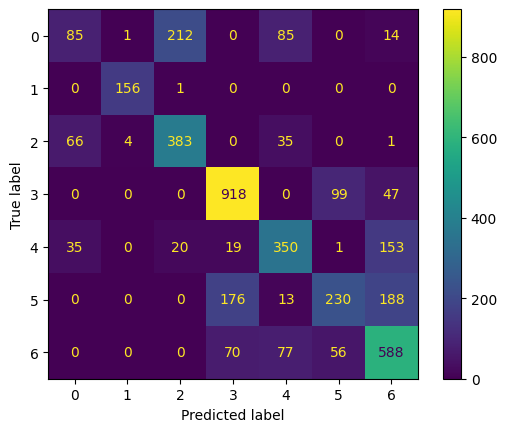

 
recall_score :  0.6551124126542112
 
precision Score :  0.6632301874609948
 
log loss :  1.0738462342454322
 
log loss_dummy :  1.834217157999518
 
****************************************************************************************************
 


In [63]:
acc_train=[]
acc_cv=[]
k_values=[]
for i in range(1,30,2):
    acc=[]
    acc_train=[]
    err=[]
    conf=[]
    recall=[]
    prec=[]
    k=[]
    logloss=[]
    logloss_dummy=[]
    for train_index,cv_index in kf.split(x_train,y_train):
        x_trainf,x_cv,y_trainf,y_cv=x_train.iloc[train_index],x_train.iloc[cv_index],y_train.iloc[train_index],y_train.iloc[cv_index]
        knn=KNeighborsClassifier(n_neighbors=i)
        model=knn.fit(x_trainf,y_trainf)
        predicted_train=model.predict(x_trainf)
        acc_train.append(accuracy_score(y_trainf,predicted_train))
        predicted=model.predict(x_cv)
        acc.append(accuracy_score(y_cv,predicted))
        err.append(1-accuracy_score(y_cv,predicted))
        conf.append(confusion_matrix(y_cv,predicted,labels=model.classes_))
        recall.append(recall_score(y_cv,predicted,average=None))
        prec.append(precision_score(y_cv,predicted,average=None))
        predicted=model.predict_proba(x_cv)
        logloss.append(log_loss(y_cv,predicted))
        dc=DummyClassifier()
        dc_model=dc.fit(x_trainf,y_trainf)
        dc_predit=dc_model.predict_proba(x_test)
        logloss_dummy.append(log_loss(y_test,dc_predit))
   
    print("K_value",i)
    print("")
    acc_train
    print("")
    acc_cv.append(np.mean(acc))
    print("avg_accuracy : ",np.mean(acc))
    print("")
    print("avg_err : ",np.mean(err))
    print(" ")
    
    plt.figure(figsize=(20,8))
    cm=ConfusionMatrixDisplay(np.int64(np.round((conf[0]+conf[1]+conf[2])/3)))
    cm.plot()
    plt.show()
    print(" ")
    print("recall_score : ",np.mean(recall))
    print(" ")
    print("precision Score : ",np.mean(prec))
    print(" ")
    print("log loss : ",np.mean(logloss))
    print(" ")
    print("log loss_dummy : ",np.mean(logloss_dummy))
    print(" ")
    print("*"*100)
k_values.append(i)


print(" ")



In [64]:
sf=StratifiedKFold(n_splits=3)

K_value 1

avg_accuracy train :  1.0

avg_accuracy :  0.8234141562576537

avg_err :  0.17658584374234632
 
[[237.   1. 115.   0.  24.   2.  18.]
 [  1. 156.   0.   0.   0.   0.   0.]
 [ 68.   0. 403.   0.  15.   1.   2.]
 [  0.   0.   0. 934.   4.  26. 100.]
 [ 12.   0.  26.  12. 490.   1.  38.]
 [  4.   0.   1.  39.   1. 502.  61.]
 [  8.   0.   2.  98.  21.  21. 641.]]
 


<Figure size 2000x800 with 0 Axes>

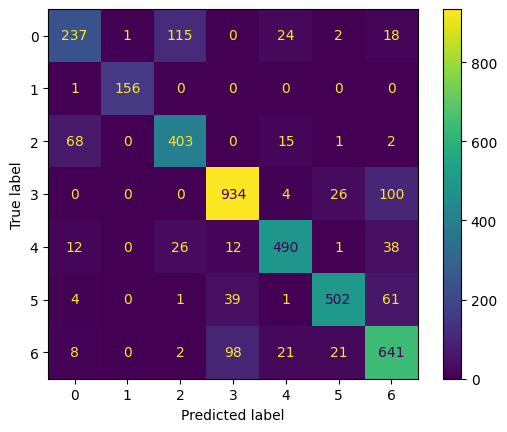

 
recall_score :  0.8251404425874777
 
precision Score :  0.8357553113955363
 
f1_score : 0.828681686307948

log loss :  6.364798945273935
 
log loss dummy :  1.834217157999518
 
****************************************************************************************************
K_value 3

avg_accuracy train :  0.9013388848069231

avg_accuracy :  0.8126377663482733

avg_err :  0.18736223365172666
 
[[205.   0. 142.   0.  29.   1.  18.]
 [  0. 156.   1.   0.   0.   0.   0.]
 [ 72.   0. 399.   0.  16.   0.   1.]
 [  0.   0.   0. 971.   1.  18.  74.]
 [ 20.   0.  27.  15. 472.   0.  45.]
 [  6.   0.   2.  58.   2. 469.  71.]
 [ 10.   0.   2.  97.  22.  12. 647.]]
 


<Figure size 2000x800 with 0 Axes>

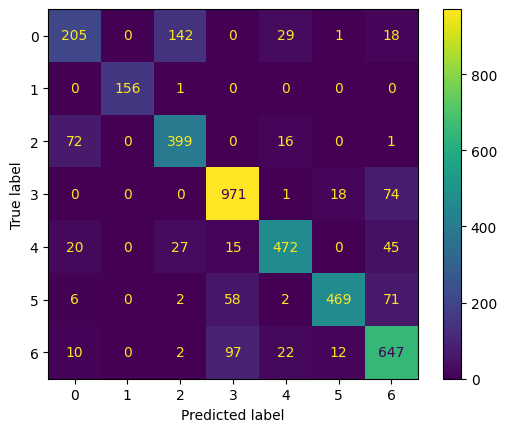

 
recall_score :  0.8063116220104359
 
precision Score :  0.822837318654935
 
f1_score : 0.811074974923937

log loss :  2.9567680815923403
 
log loss dummy :  1.834217157999518
 
****************************************************************************************************
K_value 5

avg_accuracy train :  0.8632133235366153

avg_accuracy :  0.7913299044819985

avg_err :  0.20867009551800145
 
[[171.   1. 165.   0.  41.   1.  18.]
 [  0. 156.   1.   0.   0.   0.   0.]
 [ 69.   0. 397.   0.  20.   1.   2.]
 [  0.   0.   0. 978.   1.  23.  62.]
 [ 22.   0.  29.  15. 456.   0.  58.]
 [  3.   0.   1.  70.   4. 441.  90.]
 [  4.   0.   2. 103.  33.  16. 633.]]
 


<Figure size 2000x800 with 0 Axes>

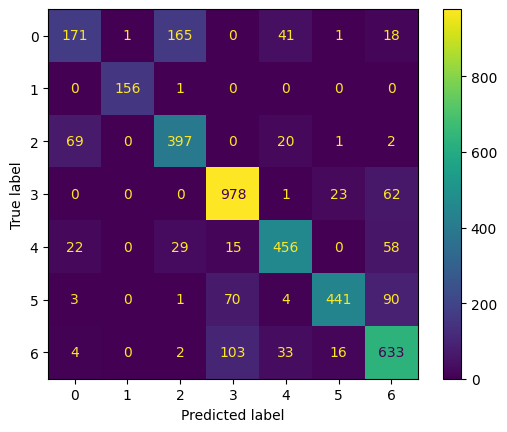

 
recall_score :  0.7811994173128243
 
precision Score :  0.8016457200759577
 
f1_score : 0.7853433841465789

log loss :  2.1476688325288786
 
log loss dummy :  1.834217157999518
 
****************************************************************************************************
K_value 7

avg_accuracy train :  0.8300269409747734

avg_accuracy :  0.7704302392032002

avg_err :  0.22956976079679972
 
[[150.   0. 178.   0.  50.   0.  18.]
 [  0. 156.   1.   0.   0.   0.   0.]
 [ 72.   0. 388.   0.  26.   0.   2.]
 [  0.   0.   0. 974.   0.  29.  61.]
 [ 20.   0.  30.  17. 437.   0.  75.]
 [  3.   0.   0.  81.   4. 408. 112.]
 [  3.   0.   0. 100.  38.  17. 634.]]
 


<Figure size 2000x800 with 0 Axes>

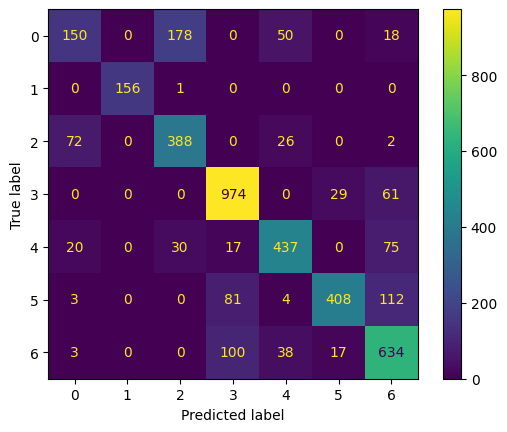

 
recall_score :  0.7586233970709605
 
precision Score :  0.7813774339257245
 
f1_score : 0.7620720991566718

log loss :  1.769392442446806
 
log loss dummy :  1.834217157999518
 
****************************************************************************************************
K_value 9

avg_accuracy train :  0.8052902277736959

avg_accuracy :  0.7538574577516531

avg_err :  0.24614254224834684
 
[[140.   0. 180.   0.  60.   0.  17.]
 [  0. 156.   1.   0.   0.   0.   0.]
 [ 80.   1. 378.   0.  28.   0.   3.]
 [  0.   0.   0. 974.   0.  32.  57.]
 [ 24.   0.  27.  18. 421.   0.  88.]
 [  2.   0.   0.  96.   6. 380. 124.]
 [  2.   0.   0.  99.  42.  19. 629.]]
 


<Figure size 2000x800 with 0 Axes>

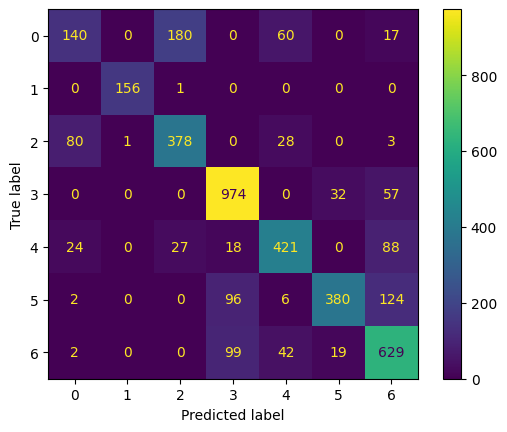

 
recall_score :  0.7408418559540463
 
precision Score :  0.763939091867034
 
f1_score : 0.7438963440368104

log loss :  1.524297957776321
 
log loss dummy :  1.834217157999518
 
****************************************************************************************************
K_value 11

avg_accuracy train :  0.7862682667972895

avg_accuracy :  0.7382643481100498

avg_err :  0.2617356518899502
 
[[119.   0. 194.   0.  65.   0.  18.]
 [  0. 156.   1.   0.   0.   0.   0.]
 [ 76.   0. 382.   0.  29.   0.   2.]
 [  0.   0.   0. 970.   0.  38.  56.]
 [ 24.   0.  29.  19. 403.   0. 103.]
 [  1.   0.   0. 108.   8. 363. 128.]
 [  0.   0.   0. 101.  49.  19. 621.]]
 


<Figure size 2000x800 with 0 Axes>

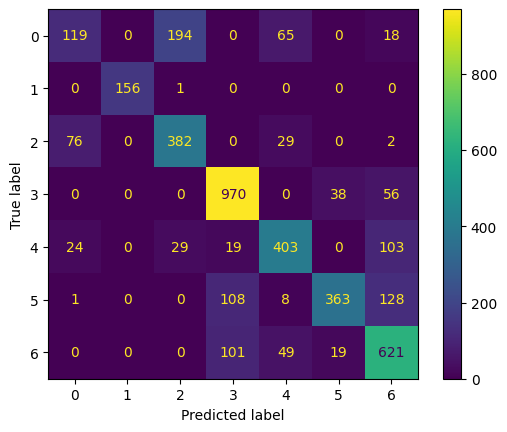

 
recall_score :  0.7242331156637712
 
precision Score :  0.7483810055833919
 
f1_score : 0.7254363532284891

log loss :  1.3938582795179772
 
log loss dummy :  1.834217157999518
 
****************************************************************************************************
K_value 13

avg_accuracy train :  0.7658176177647155

avg_accuracy :  0.7229977957384276

avg_err :  0.27700220426157235
 
[[106.   0. 203.   0.  72.   0.  16.]
 [  0. 156.   1.   0.   0.   0.   0.]
 [ 74.   0. 381.   0.  32.   0.   2.]
 [  0.   0.   0. 962.   0.  46.  56.]
 [ 27.   0.  26.  19. 394.   0. 112.]
 [  1.   0.   0. 121.   8. 337. 141.]
 [  0.   0.   0.  99.  54.  22. 616.]]
 


<Figure size 2000x800 with 0 Axes>

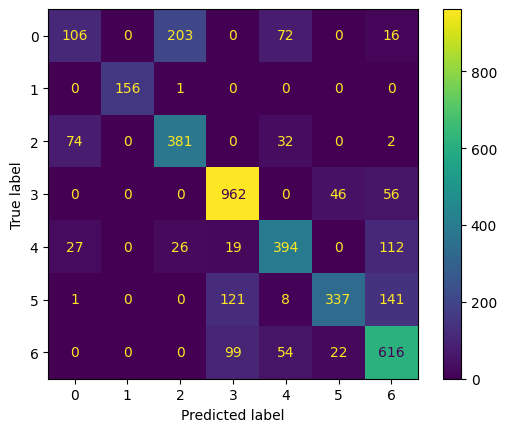

 
recall_score :  0.7088690776668566
 
precision Score :  0.7315705712896279
 
f1_score : 0.7081288161923693

log loss :  1.314407970762016
 
log loss dummy :  1.834217157999518
 
****************************************************************************************************
K_value 15

avg_accuracy train :  0.7484284431382154

avg_accuracy :  0.7132827169564863

avg_err :  0.28671728304351374
 
[[ 93.   0. 209.   0.  79.   0.  15.]
 [  0. 156.   1.   0.   0.   0.   0.]
 [ 74.   1. 380.   0.  33.   0.   1.]
 [  0.   0.   0. 963.   0.  50.  51.]
 [ 30.   0.  22.  21. 385.   0. 120.]
 [  1.   0.   0. 125.   9. 324. 150.]
 [  1.   0.   0.  94.  58.  27. 611.]]
 


<Figure size 2000x800 with 0 Axes>

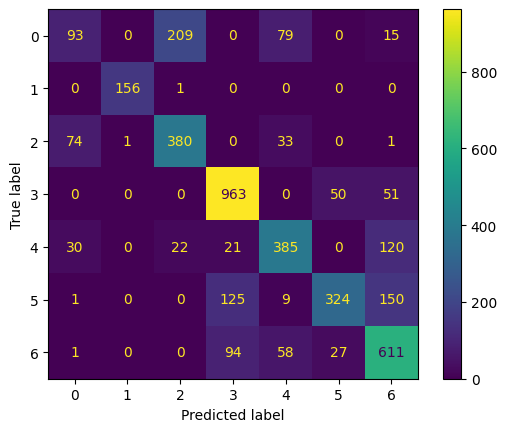

 
recall_score :  0.6978126778560305
 
precision Score :  0.7171294355020862
 
f1_score : 0.695131629455029

log loss :  1.2567635565850492
 
log loss dummy :  1.834217157999518
 
****************************************************************************************************
K_value 17

avg_accuracy train :  0.734835496775247

avg_accuracy :  0.7000571475222467

avg_err :  0.2999428524777533
 
[[ 88.   1. 213.   0.  79.   0.  15.]
 [  0. 156.   1.   0.   0.   0.   0.]
 [ 72.   1. 382.   0.  32.   0.   1.]
 [  0.   0.   0. 957.   0.  55.  51.]
 [ 32.   0.  22.  20. 375.   0. 129.]
 [  1.   0.   0. 137.   9. 298. 162.]
 [  0.   0.   0.  91.  66.  32. 602.]]
 


<Figure size 2000x800 with 0 Axes>

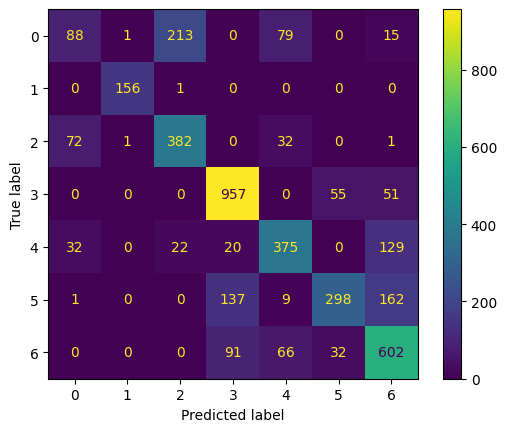

 
recall_score :  0.6855606495824125
 
precision Score :  0.7029346670766715
 
f1_score : 0.6811068252814495

log loss :  1.2208601145888027
 
log loss dummy :  1.834217157999518
 
****************************************************************************************************
K_value 19

avg_accuracy train :  0.7271614009306883

avg_accuracy :  0.6930361662176504

avg_err :  0.3069638337823496
 
[[ 90.   1. 210.   0.  82.   0.  15.]
 [  0. 156.   1.   0.   0.   0.   0.]
 [ 71.   1. 384.   0.  32.   0.   1.]
 [  0.   0.   0. 948.   0.  63.  52.]
 [ 34.   0.  19.  19. 369.   0. 139.]
 [  0.   0.   0. 147.  10. 284. 166.]
 [  0.   0.   0.  88.  67.  36. 599.]]
 


<Figure size 2000x800 with 0 Axes>

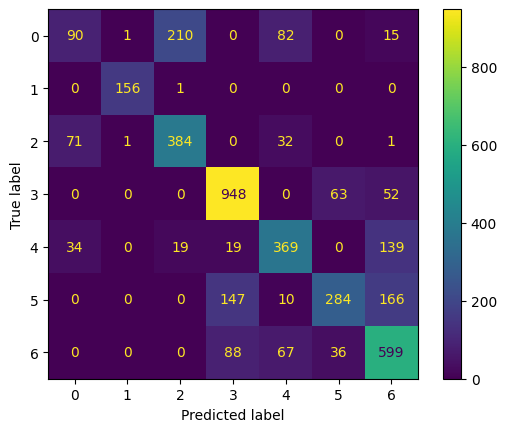

 
recall_score :  0.6801200749920688
 
precision Score :  0.6969371596130948
 
f1_score : 0.6754019426843676

log loss :  1.1911573583137398
 
log loss dummy :  1.834217157999518
 
****************************************************************************************************
K_value 21

avg_accuracy train :  0.7160992734100743

avg_accuracy :  0.6860151849130541

avg_err :  0.31398481508694587
 
[[ 85.   1. 211.   0.  84.   0.  15.]
 [  0. 156.   1.   0.   0.   0.   0.]
 [ 73.   0. 380.   0.  34.   0.   1.]
 [  0.   0.   0. 946.   0.  65.  53.]
 [ 34.   0.  19.  19. 364.   0. 142.]
 [  0.   0.   0. 153.  11. 272. 171.]
 [  0.   0.   0.  88.  70.  36. 596.]]
 


<Figure size 2000x800 with 0 Axes>

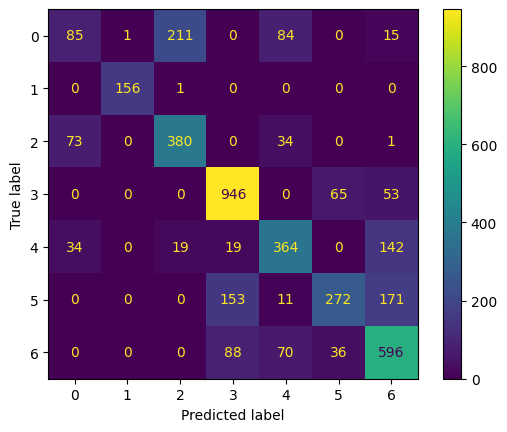

 
recall_score :  0.6729986106003335
 
precision Score :  0.6896463663523
 
f1_score : 0.6678059688116427

log loss :  1.1769580436364786
 
log loss dummy :  1.834217157999518
 
****************************************************************************************************
K_value 23

avg_accuracy train :  0.7080578006367867

avg_accuracy :  0.6831578088007184

avg_err :  0.31684219119928153
 
[[ 85.   1. 212.   0.  85.   0.  14.]
 [  0. 156.   1.   0.   0.   0.   0.]
 [ 68.   1. 383.   0.  35.   0.   1.]
 [  0.   0.   0. 943.   0.  72.  49.]
 [ 32.   0.  19.  18. 362.   0. 147.]
 [  0.   0.   0. 157.  12. 265. 173.]
 [  0.   0.   0.  83.  69.  42. 596.]]
 


<Figure size 2000x800 with 0 Axes>

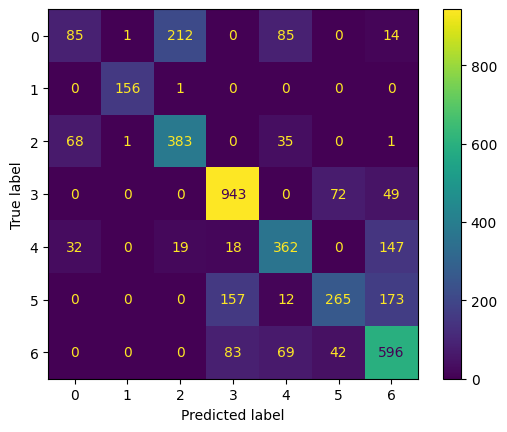

 
recall_score :  0.6706807614682132
 
precision Score :  0.6862081033493774
 
f1_score : 0.6644808967324396

log loss :  1.1395032154701266
 
log loss dummy :  1.834217157999518
 
****************************************************************************************************
K_value 25

avg_accuracy train :  0.7004245244509756

avg_accuracy :  0.6783410890684953

avg_err :  0.3216589109315046
 
[[ 85.   1. 211.   0.  86.   0.  14.]
 [  0. 156.   1.   0.   0.   0.   0.]
 [ 65.   4. 385.   0.  34.   0.   2.]
 [  0.   0.   0. 934.   0.  83.  47.]
 [ 31.   0.  20.  17. 361.   0. 149.]
 [  0.   0.   0. 161.  13. 256. 177.]
 [  0.   0.   0.  78.  73.  46. 593.]]
 


<Figure size 2000x800 with 0 Axes>

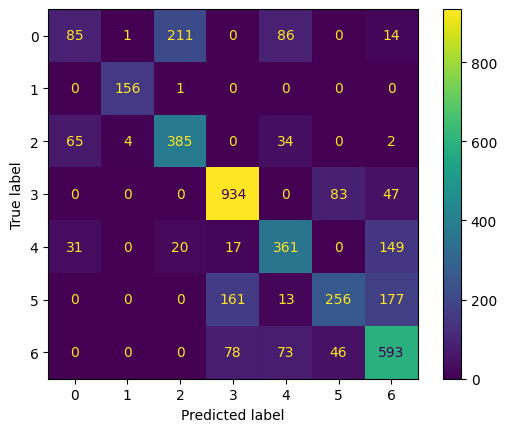

 
recall_score :  0.667242208283678
 
precision Score :  0.6794791869624268
 
f1_score : 0.6593124104698246

log loss :  1.1123471075252038
 
log loss dummy :  1.834217157999518
 
****************************************************************************************************
K_value 27

avg_accuracy train :  0.6933627234876316

avg_accuracy :  0.6697689607314882

avg_err :  0.3302310392685118
 
[[ 87.   1. 211.   0.  84.   0.  14.]
 [  0. 156.   1.   0.   0.   0.   0.]
 [ 68.   4. 381.   0.  35.   0.   1.]
 [  0.   0.   0. 928.   0.  87.  49.]
 [ 38.   0.  18.  19. 352.   1. 150.]
 [  0.   0.   0. 169.  13. 240. 185.]
 [  0.   0.   0.  74.  76.  51. 590.]]
 


<Figure size 2000x800 with 0 Axes>

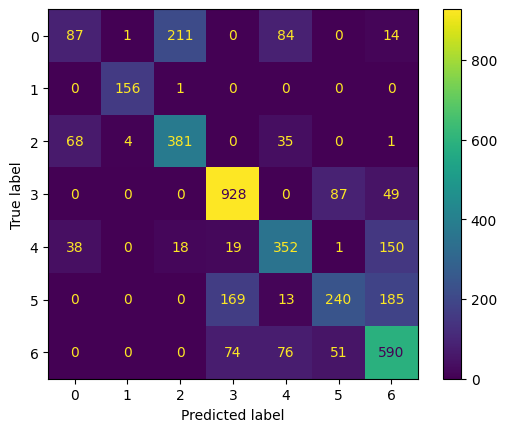

 
recall_score :  0.659779921987875
 
precision Score :  0.6696309007696621
 
f1_score : 0.651723684157035

log loss :  1.0923289685809705
 
log loss dummy :  1.834217157999518
 
****************************************************************************************************
K_value 29

avg_accuracy train :  0.6895664952241

avg_accuracy :  0.6638909298718263

avg_err :  0.33610907012817376
 
[[ 85.   1. 212.   0.  85.   0.  14.]
 [  0. 156.   1.   0.   0.   0.   0.]
 [ 66.   4. 383.   0.  35.   0.   1.]
 [  0.   0.   0. 918.   0.  99.  47.]
 [ 35.   0.  20.  19. 350.   1. 153.]
 [  0.   0.   0. 176.  13. 230. 188.]
 [  0.   0.   0.  70.  77.  56. 588.]]
 


<Figure size 2000x800 with 0 Axes>

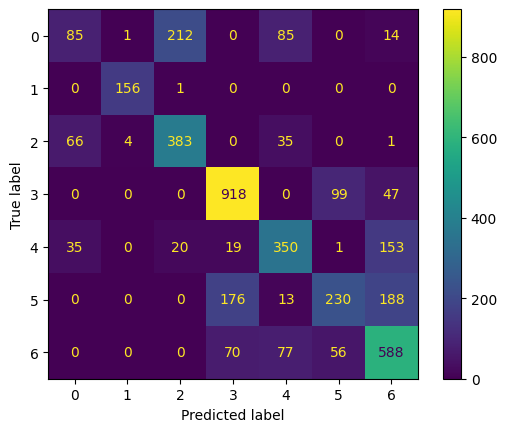

 
recall_score :  0.6551124126542112
 
precision Score :  0.6632301874609948
 
f1_score : 0.6461410179732751

log loss :  1.0738462342454322
 
log loss dummy :  1.834217157999518
 
****************************************************************************************************
K_value 31

avg_accuracy train :  0.6840558412931669

avg_accuracy :  0.6592374887745939

avg_err :  0.3407625112254061
 
[[ 80.   2. 215.   0.  87.   0.  13.]
 [  0. 157.   0.   0.   0.   0.   0.]
 [ 66.   5. 380.   0.  36.   0.   1.]
 [  0.   0.   0. 917.   0.  99.  48.]
 [ 36.   0.  19.  19. 350.   0. 155.]
 [  0.   0.   0. 175.  14. 224. 194.]
 [  0.   0.   0.  71.  78.  58. 584.]]
 


<Figure size 2000x800 with 0 Axes>

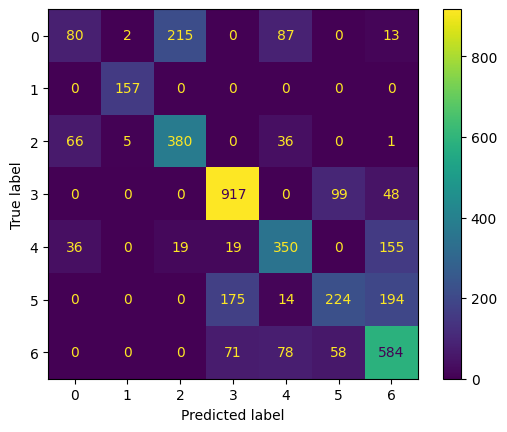

 
recall_score :  0.6506448213100685
 
precision Score :  0.6551323134349727
 
f1_score : 0.6396230474617453

log loss :  1.0489821898598921
 
log loss dummy :  1.834217157999518
 
****************************************************************************************************
K_value 33

avg_accuracy train :  0.680626989958364

avg_accuracy :  0.6567066699322394

avg_err :  0.3432933300677606
 
[[ 79.   2. 217.   0.  85.   0.  13.]
 [  0. 157.   0.   0.   0.   0.   0.]
 [ 65.   6. 380.   0.  37.   0.   1.]
 [  0.   0.   0. 914.   0. 102.  48.]
 [ 37.   0.  17.  18. 350.   1. 155.]
 [  0.   0.   0. 182.  14. 215. 196.]
 [  0.   0.   0.  70.  76.  59. 587.]]
 


<Figure size 2000x800 with 0 Axes>

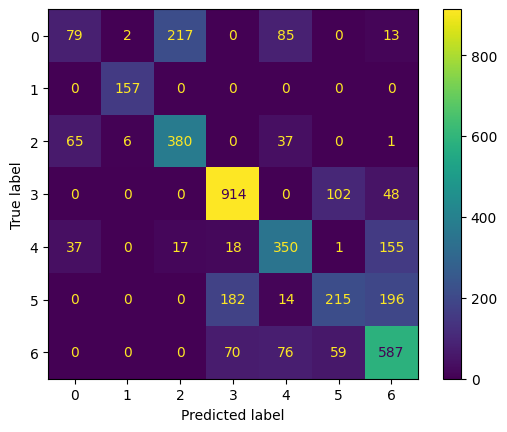

 
recall_score :  0.6483806411632825
 
precision Score :  0.6517579371697899
 
f1_score : 0.636558234734546

log loss :  1.0415956994443434
 
log loss dummy :  1.834217157999518
 
****************************************************************************************************
K_value 35

avg_accuracy train :  0.6747081394399542

avg_accuracy :  0.6543391297248754

avg_err :  0.3456608702751245
 
[[ 79.   2. 218.   0.  84.   0.  14.]
 [  0. 157.   0.   0.   0.   0.   0.]
 [ 65.   8. 378.   0.  36.   0.   1.]
 [  0.   0.   0. 914.   0. 104.  46.]
 [ 39.   0.  15.  18. 349.   2. 155.]
 [  0.   0.   0. 186.  16. 209. 197.]
 [  0.   0.   0.  65.  76.  64. 585.]]
 


<Figure size 2000x800 with 0 Axes>

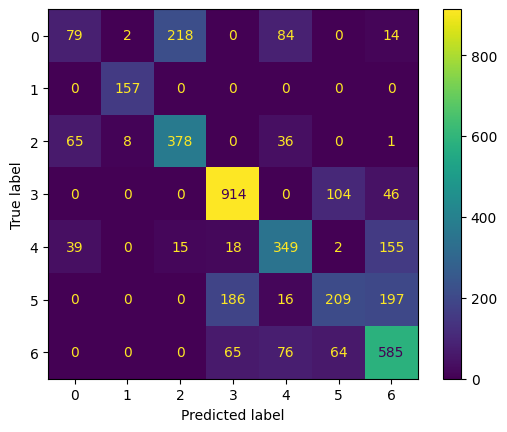

 
recall_score :  0.6459984436177825
 
precision Score :  0.6467299038481672
 
f1_score : 0.6333214908549667

log loss :  1.0221148597310428
 
log loss dummy :  1.834217157999518
 
****************************************************************************************************
K_value 37

avg_accuracy train :  0.6698506000489836

avg_accuracy :  0.6518899502000164

avg_err :  0.34811004979998367
 
[[ 78.   2. 218.   0.  86.   0.  13.]
 [  0. 157.   0.   0.   0.   0.   0.]
 [ 63.   8. 380.   0.  36.   0.   1.]
 [  0.   0.   0. 913.   0. 105.  46.]
 [ 36.   0.  16.  17. 350.   2. 156.]
 [  0.   0.   0. 190.  16. 201. 201.]
 [  0.   0.   0.  64.  77.  67. 583.]]
 


<Figure size 2000x800 with 0 Axes>

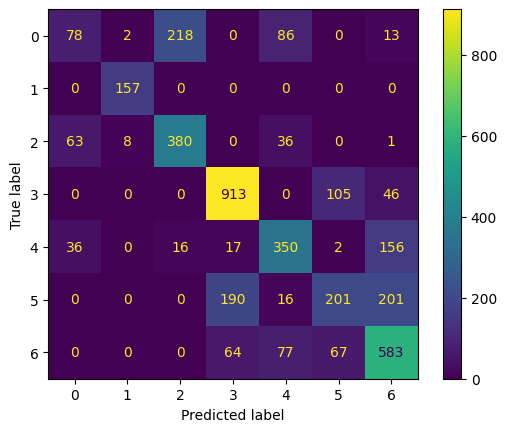

 
recall_score :  0.6438036546126459
 
precision Score :  0.6442329604248503
 
f1_score : 0.6304061303331268

log loss :  1.016053551737408
 
log loss dummy :  1.834217157999518
 
****************************************************************************************************
K_value 39

avg_accuracy train :  0.6663809290554331

avg_accuracy :  0.6476447056902604

avg_err :  0.3523552943097396
 
[[ 70.   2. 223.   0.  89.   0.  13.]
 [  0. 157.   0.   0.   0.   0.   0.]
 [ 62.   9. 380.   0.  37.   0.   1.]
 [  0.   0.   0. 911.   0. 108.  44.]
 [ 37.   0.  15.  17. 349.   3. 157.]
 [  0.   0.   0. 190.  16. 198. 204.]
 [  0.   0.   0.  62.  79.  70. 580.]]
 


<Figure size 2000x800 with 0 Axes>

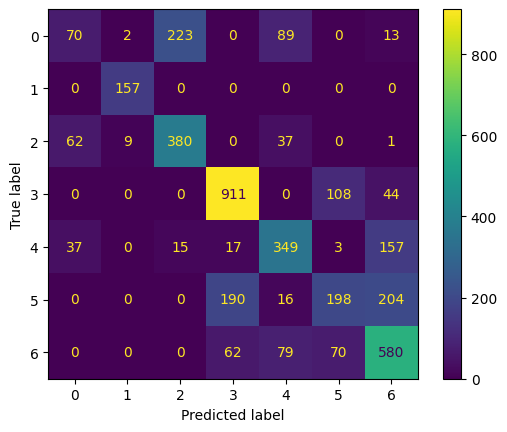

 
recall_score :  0.6390721481134259
 
precision Score :  0.6363644041565057
 
f1_score : 0.6240778107253575

log loss :  1.0103154546435167
 
log loss dummy :  1.834217157999518
 
****************************************************************************************************
K_value 41

avg_accuracy train :  0.664625683729284

avg_accuracy :  0.6478896236427464

avg_err :  0.3521103763572537
 
[[ 69.   2. 224.   0.  89.   0.  13.]
 [  0. 157.   0.   0.   0.   0.   0.]
 [ 62.   9. 381.   0.  36.   0.   1.]
 [  0.   0.   0. 914.   0. 107.  43.]
 [ 35.   0.  17.  18. 348.   3. 157.]
 [  0.   0.   0. 192.  15. 196. 205.]
 [  0.   0.   0.  60.  79.  71. 581.]]
 


<Figure size 2000x800 with 0 Axes>

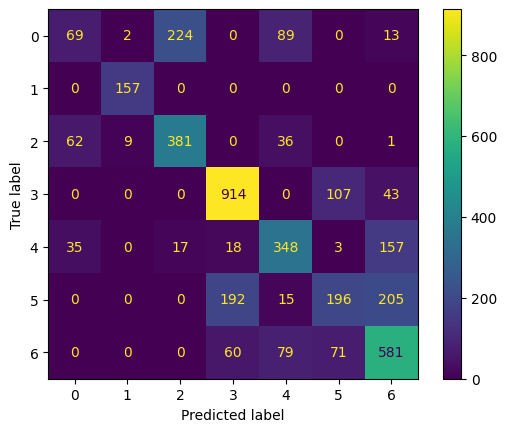

 
recall_score :  0.6388148939711963
 
precision Score :  0.635697910841138
 
f1_score : 0.6233967886700015

log loss :  1.000404867317704
 
log loss dummy :  1.834217157999518
 
****************************************************************************************************
K_value 43

avg_accuracy train :  0.6623806024981631

avg_accuracy :  0.6454404441178873

avg_err :  0.35455955588211285
 
[[ 67.   2. 225.   0.  90.   0.  13.]
 [  0. 157.   0.   0.   0.   0.   0.]
 [ 59.   9. 385.   0.  36.   0.   1.]
 [  0.   0.   0. 908.   0. 110.  46.]
 [ 35.   0.  16.  17. 346.   5. 159.]
 [  0.   0.   0. 192.  16. 193. 207.]
 [  0.   0.   0.  59.  77.  74. 580.]]
 


<Figure size 2000x800 with 0 Axes>

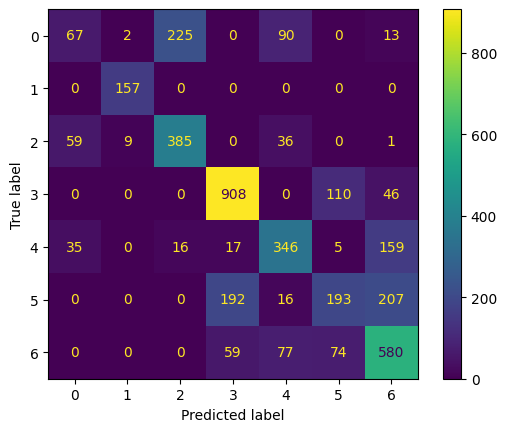

 
recall_score :  0.6369617563429409
 
precision Score :  0.6334310226649885
 
f1_score : 0.6209181393571244

log loss :  0.9796900619479331
 
log loss dummy :  1.834217157999518
 
****************************************************************************************************
K_value 45

avg_accuracy train :  0.6602171605845375

avg_accuracy :  0.6439709364029716

avg_err :  0.3560290635970283
 
[[ 66.   2. 228.   0.  88.   0.  13.]
 [  0. 157.   0.   0.   0.   0.   0.]
 [ 55.   9. 388.   0.  36.   0.   1.]
 [  0.   0.   0. 905.   0. 115.  44.]
 [ 35.   0.  17.  16. 344.   5. 162.]
 [  0.   0.   0. 193.  17. 193. 205.]
 [  0.   0.   0.  60.  79.  74. 577.]]
 


<Figure size 2000x800 with 0 Axes>

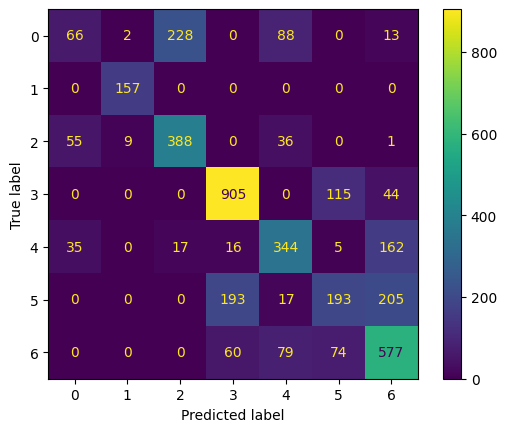

 
recall_score :  0.6359570694264588
 
precision Score :  0.6330678882552664
 
f1_score : 0.6196707734332383

log loss :  0.9764736235884156
 
log loss dummy :  1.834217157999518
 
****************************************************************************************************
K_value 47

avg_accuracy train :  0.6575230631071926

avg_accuracy :  0.6427463466405421

avg_err :  0.3572536533594579
 
[[ 62.   2. 230.   0.  89.   0.  13.]
 [  0. 157.   0.   0.   0.   0.   0.]
 [ 54.   9. 390.   0.  35.   0.   1.]
 [  0.   0.   0. 902.   0. 117.  44.]
 [ 35.   0.  17.  16. 343.   5. 163.]
 [  0.   0.   0. 195.  16. 192. 205.]
 [  0.   0.   0.  57.  79.  75. 579.]]
 


<Figure size 2000x800 with 0 Axes>

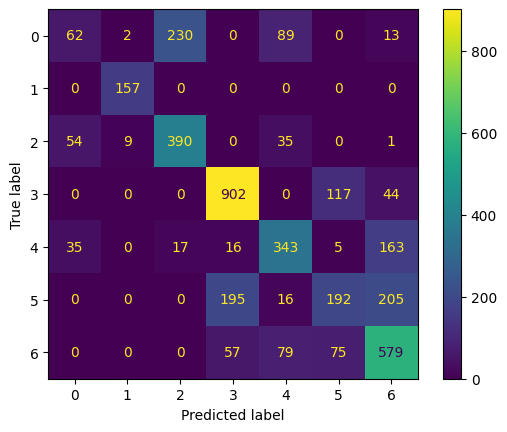

 
recall_score :  0.6345906596165608
 
precision Score :  0.6301794233537474
 
f1_score : 0.6171233892272939

log loss :  0.9709063532226181
 
log loss dummy :  1.834217157999518
 
****************************************************************************************************
K_value 49

avg_accuracy train :  0.6567066699322394

avg_accuracy :  0.64086864233815

avg_err :  0.35913135766185
 
[[ 62.   2. 231.   0.  89.   0.  13.]
 [  0. 157.   0.   0.   0.   0.   0.]
 [ 53.   9. 390.   0.  35.   0.   1.]
 [  0.   0.   0. 904.   0. 117.  43.]
 [ 35.   0.  17.  15. 343.   6. 161.]
 [  0.   0.   0. 198.  18. 186. 207.]
 [  0.   0.   0.  57.  81.  77. 575.]]
 


<Figure size 2000x800 with 0 Axes>

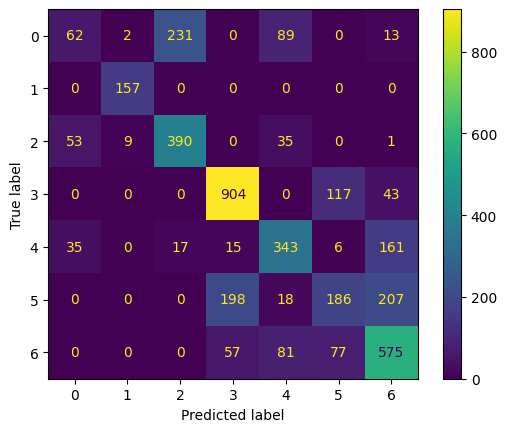

 
recall_score :  0.6328590509492654
 
precision Score :  0.6279035564125378
 
f1_score : 0.6153198606540268

log loss :  0.9721187720960208
 
log loss dummy :  1.834217157999518
 
****************************************************************************************************
K_value 51

avg_accuracy train :  0.6546656869948567

avg_accuracy :  0.6404604457506734

avg_err :  0.3595395542493265
 
[[ 61.   2. 231.   0.  88.   0.  14.]
 [  0. 157.   0.   0.   0.   0.   0.]
 [ 54.   9. 390.   0.  35.   0.   1.]
 [  0.   0.   0. 904.   0. 116.  43.]
 [ 36.   0.  17.  15. 342.   7. 161.]
 [  0.   0.   0. 197.  17. 184. 210.]
 [  0.   0.   0.  56.  81.  78. 576.]]
 


<Figure size 2000x800 with 0 Axes>

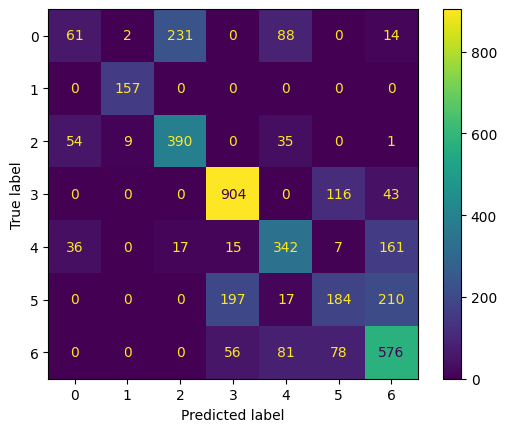

 
recall_score :  0.6322355837648513
 
precision Score :  0.6265542218179357
 
f1_score : 0.614471411261527

log loss :  0.9659145265944966
 
log loss dummy :  1.834217157999518
 
****************************************************************************************************
K_value 53

avg_accuracy train :  0.6527879826924646

avg_accuracy :  0.6395624132582252

avg_err :  0.36043758674177484
 
[[ 60.   2. 232.   0.  89.   0.  13.]
 [  0. 157.   0.   0.   0.   0.   0.]
 [ 55.   9. 390.   0.  34.   0.   1.]
 [  0.   0.   0. 902.   0. 119.  42.]
 [ 36.   0.  18.  14. 343.   7. 161.]
 [  0.   0.   0. 198.  17. 182. 211.]
 [  0.   0.   0.  53.  80.  80. 578.]]
 


<Figure size 2000x800 with 0 Axes>

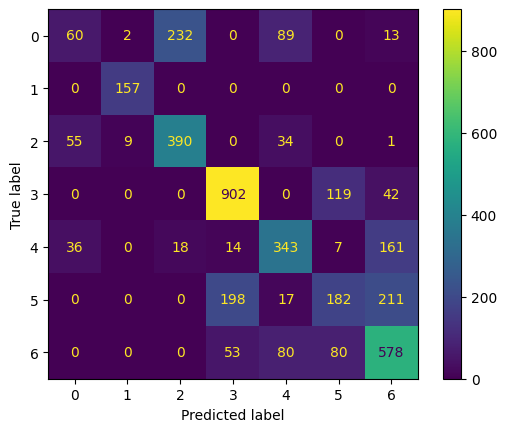

 
recall_score :  0.6313124565733746
 
precision Score :  0.6245725733516974
 
f1_score : 0.6131909269200325

log loss :  0.9593635130580211
 
log loss dummy :  1.834217157999518
 
****************************************************************************************************
K_value 55

avg_accuracy train :  0.6510327373663157

avg_accuracy :  0.638419462813291

avg_err :  0.36158053718670913
 
[[ 61.   2. 232.   0.  88.   0.  14.]
 [  0. 157.   0.   0.   0.   0.   0.]
 [ 54.   9. 391.   0.  34.   0.   1.]
 [  0.   0.   0. 900.   0. 124.  40.]
 [ 36.   0.  18.  15. 341.   7. 162.]
 [  0.   0.   0. 197.  17. 182. 212.]
 [  0.   0.   0.  53.  81.  81. 576.]]
 


<Figure size 2000x800 with 0 Axes>

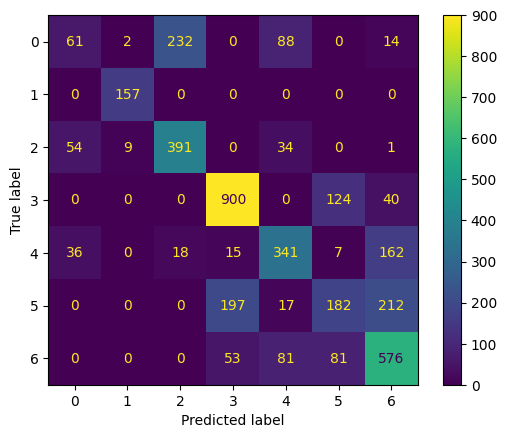

 
recall_score :  0.6307217381214544
 
precision Score :  0.6247054826618869
 
f1_score : 0.6128400322601802

log loss :  0.9475245414406479
 
log loss dummy :  1.834217157999518
 
****************************************************************************************************
K_value 57

avg_accuracy train :  0.6497673279451384

avg_accuracy :  0.6385011021307861

avg_err :  0.36149889786921374
 
[[ 61.   2. 232.   0.  88.   0.  14.]
 [  0. 157.   0.   0.   0.   0.   0.]
 [ 51.   9. 392.   0.  36.   0.   1.]
 [  0.   0.   0. 898.   0. 125.  41.]
 [ 37.   0.  18.  15. 342.   7. 160.]
 [  0.   0.   0. 200.  17. 180. 212.]
 [  0.   0.   0.  54.  79.  80. 578.]]
 


<Figure size 2000x800 with 0 Axes>

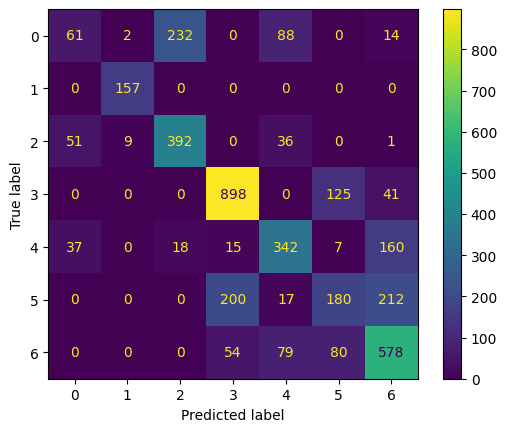

 
recall_score :  0.6309196818816623
 
precision Score :  0.6247460363894447
 
f1_score : 0.6125886298297468

log loss :  0.9440356312797133
 
log loss dummy :  1.834217157999518
 
****************************************************************************************************
K_value 59

avg_accuracy train :  0.6496856886276431

avg_accuracy :  0.6382561841783003

avg_err :  0.36174381582169973
 
[[ 60.   2. 233.   0.  88.   0.  14.]
 [  0. 157.   0.   0.   0.   0.   0.]
 [ 49.   9. 394.   0.  36.   0.   1.]
 [  0.   0.   0. 898.   0. 124.  42.]
 [ 37.   0.  18.  15. 339.   8. 161.]
 [  0.   0.   0. 197.  17. 182. 212.]
 [  0.   0.   0.  53.  80.  82. 576.]]
 


<Figure size 2000x800 with 0 Axes>

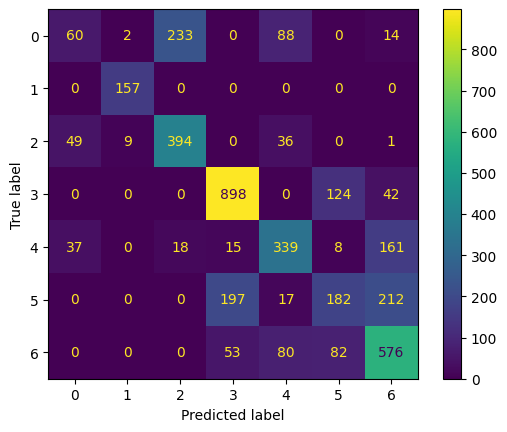

 
recall_score :  0.6307509965379721
 
precision Score :  0.6248313044665244
 
f1_score : 0.612371688598355

log loss :  0.9406680830670627
 
log loss dummy :  1.834217157999518
 
****************************************************************************************************
 


In [65]:
import matplotlib.pyplot as plt
no_of_splits=3
k=[]
avg_training_accuracy=[]
avg_accuracy=[]
avg_error=[]
avg_recall_score=[]
avg_log_loss=[]
avg_precision_score=[]
avg_f1_score=[]
avg_log_loss_dummy=[]
for i in range(1, 60, 2):
    acc = []
    acc_train = []
    err = []
    conf = []
    recall = []
    prec = []
    k = []
    logloss = []
    logloss_dummy = []
    Classification_report=[]
    f1_score_=[]
    for train_index, cv_index in kf.split(x_train, y_train):
        x_trainf, x_cv, y_trainf, y_cv = x_train.iloc[train_index], x_train.iloc[cv_index], y_train.iloc[train_index], y_train.iloc[cv_index]
        #Training the model
        knn = KNeighborsClassifier(n_neighbors=i)
        model = knn.fit(x_trainf, y_trainf)
        # Predicting the Model
        predicted_train = model.predict(x_trainf)
        # training accuracy of an model
        acc_train.append(accuracy_score(y_trainf, predicted_train))
        predicted = model.predict(x_cv)
        acc.append(accuracy_score(y_cv, predicted))
        err.append(1 - accuracy_score(y_cv, predicted))
        conf.append(confusion_matrix(y_cv, predicted, labels=model.classes_))
        recall.append(recall_score(y_cv, predicted, average=None))
        prec.append(precision_score(y_cv, predicted, average=None))
        f1_score_.append(f1_score(y_cv, predicted, average=None))
        Classification_report.append(classification_report(y_cv,predicted))
        predicted = model.predict_proba(x_cv)
        logloss.append(log_loss(y_cv, predicted))
        dc = DummyClassifier()
        dc_model = dc.fit(x_trainf, y_trainf)
        dc_predit = dc_model.predict_proba(x_test)
        logloss_dummy.append(log_loss(y_test, dc_predit))
    a = np.mean(acc_train)
    b = np.mean(acc)
    
    print("K_value", i)
    k.append(i)
    print("")
    
    avg_training_accuracy.append(np.mean(acc_train))
    print("avg_accuracy train : ", np.mean(acc_train))
    print("")
    
    avg_accuracy.append(np.mean(acc))
    print("avg_accuracy : ", np.mean(acc))
    print("")

    avg_error.append(np.mean(err))
    print("avg_err : ", np.mean(err))
    print(" ")

    print(np.round(sum(conf) / no_of_splits))
    print(" ")
    
    
    plt.figure(figsize=(20, 8))
    cm = ConfusionMatrixDisplay(np.int64(np.round((conf[0] + conf[1] + conf[2]) / 3)))
    cm.plot()
    plt.show()
    print(" ")

    avg_recall_score.append( np.mean(recall))
    print("recall_score : ", np.mean(recall))
    print(" ")

    avg_precision_score.append(np.mean(prec))
    print("precision Score : ", np.mean(prec))
    print(" ")

    avg_f1_score.append(np.mean(f1_score_))
    print("f1_score :",np.mean(f1_score_))
    print("")
    
    avg_log_loss.append(np.mean(logloss))
    print("log loss : ", np.mean(logloss))
    print(" ")

    avg_log_loss_dummy.append(np.mean(logloss_dummy))
    print("log loss dummy : ", np.mean(logloss_dummy))
    print(" ")
    print("*" * 100)

print(" ")


K_value 1

avg_accuracy train :  1.0

avg_accuracy :  0.8220262878602335

avg_err :  0.17797371213976654
 


<Figure size 2000x800 with 0 Axes>

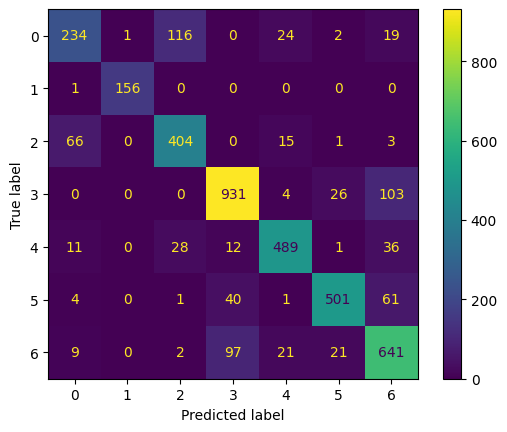

 
recall_score :  0.8238485889207074
 
precision Score :  0.8348899763571325
 
f1_score : 0.8273762562276636

log loss :  6.4148227927402575
 
log loss dummy :  1.8340319962763019
 
****************************************************************************************************
K_value 3

avg_accuracy train :  0.9010123275369418

avg_accuracy :  0.8134541595232264

avg_err :  0.1865458404767736
 


<Figure size 2000x800 with 0 Axes>

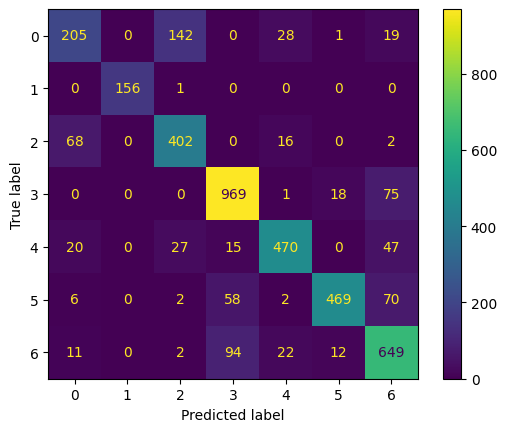

 
recall_score :  0.8073358514619703
 
precision Score :  0.8242825572146922
 
f1_score : 0.8121106004695948

log loss :  2.9505199085223723
 
log loss dummy :  1.8340319962763019
 
****************************************************************************************************
K_value 5

avg_accuracy train :  0.8626826679728957

avg_accuracy :  0.7905135113070454

avg_err :  0.20948648869295453
 


<Figure size 2000x800 with 0 Axes>

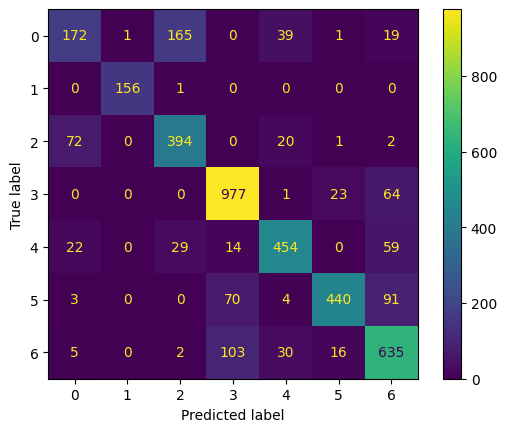

 
recall_score :  0.780539433194088
 
precision Score :  0.800753237752061
 
f1_score : 0.7848984921538916

log loss :  2.1663681559792987
 
log loss dummy :  1.8340319962763019
 
****************************************************************************************************
K_value 7

avg_accuracy train :  0.8306392358559883

avg_accuracy :  0.7710017144256675

avg_err :  0.22899828557433258
 


<Figure size 2000x800 with 0 Axes>

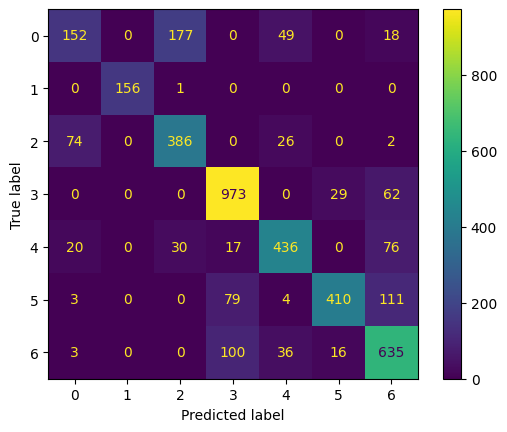

 
recall_score :  0.7591642708117672
 
precision Score :  0.78211042999781
 
f1_score : 0.7629061350360529

log loss :  1.7600900612959673
 
log loss dummy :  1.8340319962763019
 
****************************************************************************************************
K_value 9

avg_accuracy train :  0.804922850844967

avg_accuracy :  0.7533676218466813

avg_err :  0.24663237815331865
 


<Figure size 2000x800 with 0 Axes>

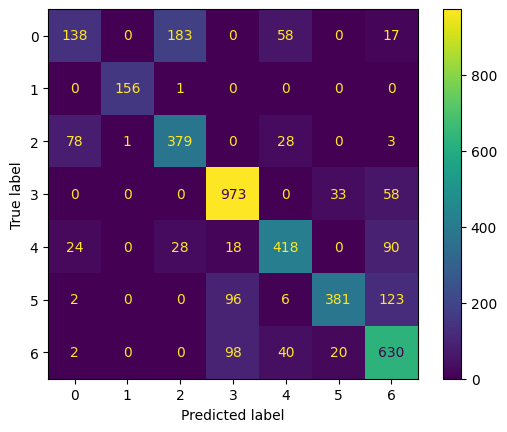

 
recall_score :  0.7401503491396053
 
precision Score :  0.7635529744523277
 
f1_score : 0.7431312808871307

log loss :  1.548729464547853
 
log loss dummy :  1.8340319962763019
 
****************************************************************************************************
K_value 11

avg_accuracy train :  0.7864315454322801

avg_accuracy :  0.7404686096824231

avg_err :  0.25953139031757694
 


<Figure size 2000x800 with 0 Axes>

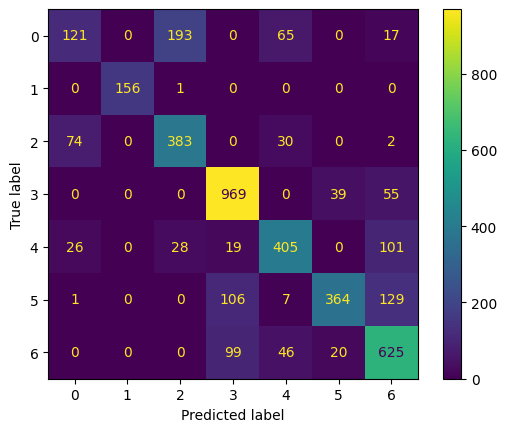

 
recall_score :  0.7263913996240478
 
precision Score :  0.7501824543785461
 
f1_score : 0.7277558166963308

log loss :  1.4205287953655974
 
log loss dummy :  1.8340319962763019
 
****************************************************************************************************
K_value 13

avg_accuracy train :  0.765858437423463

avg_accuracy :  0.7227528777859417

avg_err :  0.2772471222140583
 


<Figure size 2000x800 with 0 Axes>

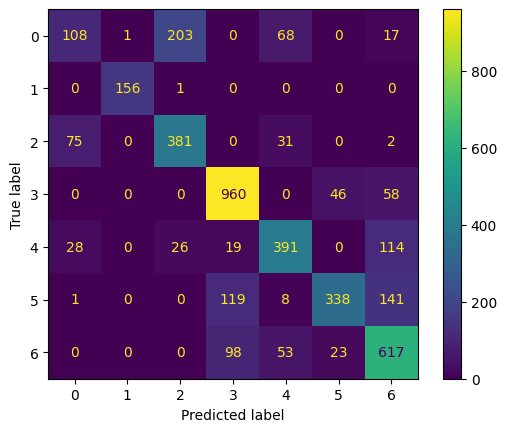

 
recall_score :  0.7088421714004566
 
precision Score :  0.7313505056126378
 
f1_score : 0.7084442897668649

log loss :  1.3447841013341415
 
log loss dummy :  1.8340319962763019
 
****************************************************************************************************
K_value 15

avg_accuracy train :  0.7487550004081966

avg_accuracy :  0.7149971426238876

avg_err :  0.28500285737611236
 


<Figure size 2000x800 with 0 Axes>

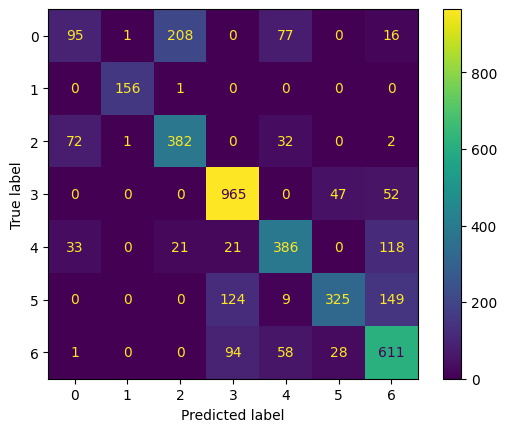

 
recall_score :  0.6996611001173868
 
precision Score :  0.7191260658094757
 
f1_score : 0.6972136292980365

log loss :  1.2845361923385195
 
log loss dummy :  1.8340319962763019
 
****************************************************************************************************
K_value 17

avg_accuracy train :  0.7361009061964242

avg_accuracy :  0.7025063270471059

avg_err :  0.29749367295289414
 


<Figure size 2000x800 with 0 Axes>

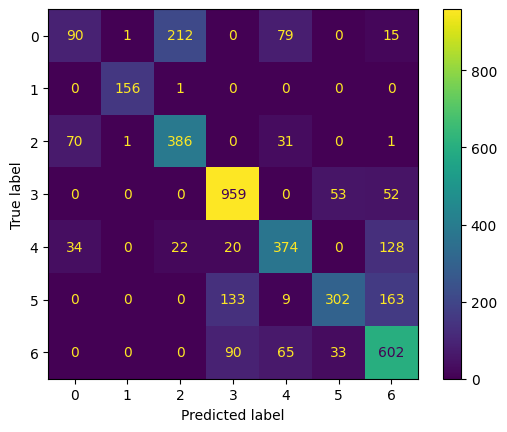

 
recall_score :  0.6881142719698091
 
precision Score :  0.7060903909261003
 
f1_score : 0.6839980569728477

log loss :  1.2428411843410867
 
log loss dummy :  1.8340319962763019
 
****************************************************************************************************
K_value 19

avg_accuracy train :  0.7271614009306883

avg_accuracy :  0.6961384602824721

avg_err :  0.30386153971752794
 


<Figure size 2000x800 with 0 Axes>

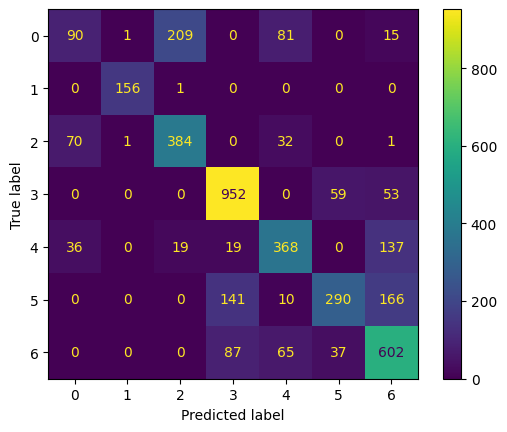

 
recall_score :  0.6826687346778583
 
precision Score :  0.700111209098076
 
f1_score : 0.6784962691870055

log loss :  1.2155430714965823
 
log loss dummy :  1.8340319962763019
 
****************************************************************************************************
K_value 21

avg_accuracy train :  0.7163441913625602

avg_accuracy :  0.6869132174055025

avg_err :  0.31308678259449746
 


<Figure size 2000x800 with 0 Axes>

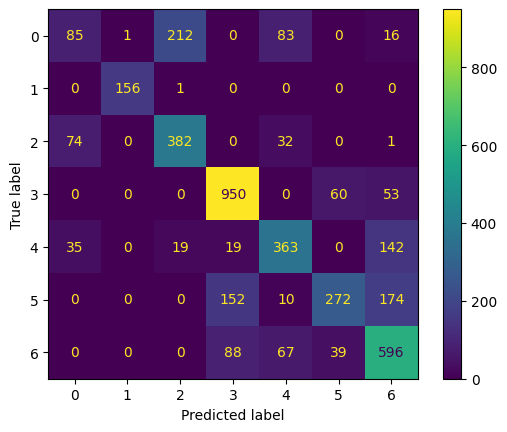

 
recall_score :  0.673443372919309
 
precision Score :  0.6906040194404961
 
f1_score : 0.6685735320506557

log loss :  1.193369762932856
 
log loss dummy :  1.8340319962763019
 
****************************************************************************************************
K_value 23

avg_accuracy train :  0.7081802596130297

avg_accuracy :  0.6822597763082702

avg_err :  0.31774022369172994
 


<Figure size 2000x800 with 0 Axes>

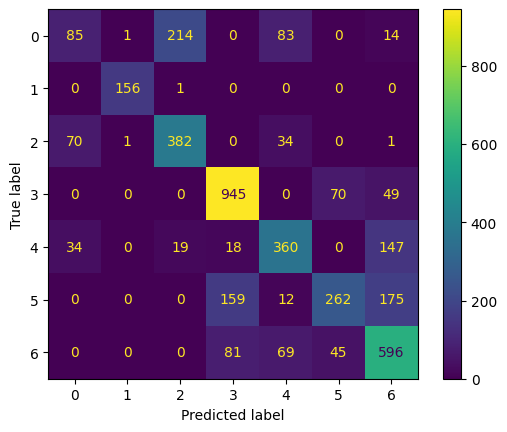

 
recall_score :  0.6695440801131809
 
precision Score :  0.6847725913939391
 
f1_score : 0.6635885191477676

log loss :  1.1687553739812981
 
log loss dummy :  1.8340319962763019
 
****************************************************************************************************
K_value 25

avg_accuracy train :  0.7016491142134051

avg_accuracy :  0.6793207608784391

avg_err :  0.32067923912156093
 


<Figure size 2000x800 with 0 Axes>

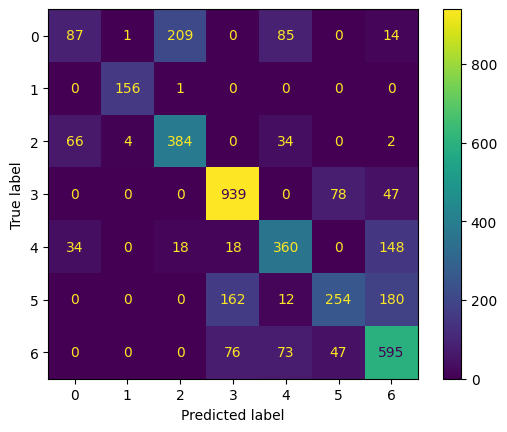

 
recall_score :  0.6677444904431725
 
precision Score :  0.6806547957756115
 
f1_score : 0.6605295744189509

log loss :  1.1395065900992185
 
log loss dummy :  1.8340319962763019
 
****************************************************************************************************
K_value 27

avg_accuracy train :  0.694383214956323

avg_accuracy :  0.6720548616213567

avg_err :  0.3279451383786432
 


<Figure size 2000x800 with 0 Axes>

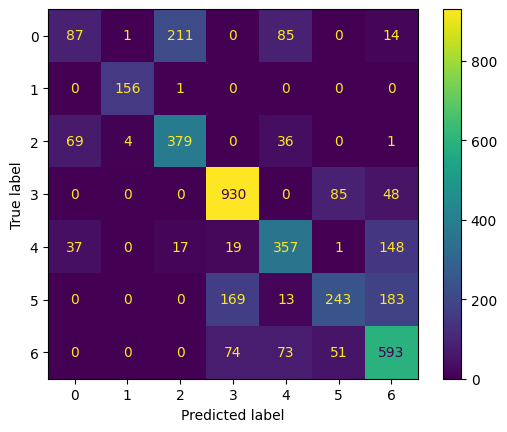

 
recall_score :  0.6612964468923967
 
precision Score :  0.6714308701403982
 
f1_score : 0.653685021143487

log loss :  1.108588442932277
 
log loss dummy :  1.8340319962763019
 
****************************************************************************************************
K_value 29

avg_accuracy train :  0.6899338721528289

avg_accuracy :  0.6648706016817699

avg_err :  0.33512939831823
 


<Figure size 2000x800 with 0 Axes>

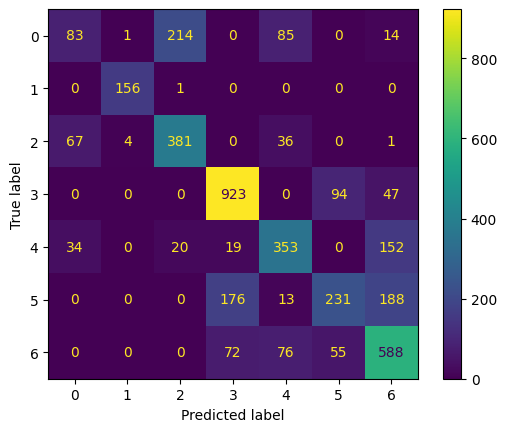

 
recall_score :  0.6549915090368369
 
precision Score :  0.6636007741162344
 
f1_score : 0.6461978024475789

log loss :  1.095352221114359
 
log loss dummy :  1.8340319962763019
 
****************************************************************************************************
 


In [69]:
import matplotlib.pyplot as plt
no_of_splits=3
k=[]
avg_training_accuracy=[]
avg_accuracy=[]
avg_error=[]
avg_recall_score=[]
avg_log_loss=[]
avg_precision_score=[]
avg_f1_score=[]
avg_log_loss_dummy=[]
for i in range(1, 30, 2):
    acc = []
    acc_train = []
    err = []
    conf = []
    recall = []
    prec = []
    k = []
    logloss = []
    logloss_dummy = []
    Classification_report=[]
    f1_score_=[]
    for train_index, cv_index in sf.split(x_train, y_train):
        x_trainf, x_cv, y_trainf, y_cv = x_train.iloc[train_index], x_train.iloc[cv_index], y_train.iloc[train_index], y_train.iloc[cv_index]
        #Training the model
        knn = KNeighborsClassifier(n_neighbors=i)
        model = knn.fit(x_trainf, y_trainf)
        # Predicting the Model
        predicted_train = model.predict(x_trainf)
        # training accuracy of an model
        
        acc_train.append(accuracy_score(y_trainf, predicted_train))
        predicted = model.predict(x_cv)
        #accuracy score
        acc.append(accuracy_score(y_cv, predicted))
        # error score
        err.append(1 - accuracy_score(y_cv, predicted))
        # confusion matrix
        conf.append(confusion_matrix(y_cv, predicted, labels=model.classes_))
        # recall scpre
        recall.append(recall_score(y_cv, predicted, average=None))
        # precsion score
        prec.append(precision_score(y_cv, predicted, average=None))
        # f1 score
        f1_score_.append(f1_score(y_cv, predicted, average=None))
        Classification_report.append(classification_report(y_cv,predicted))
        predicted = model.predict_proba(x_cv)
        # log loss score
        logloss.append(log_loss(y_cv, predicted))
        dc = DummyClassifier()
        dc_model = dc.fit(x_trainf, y_trainf)
        dc_predit = dc_model.predict_proba(x_test)
        logloss_dummy.append(log_loss(y_test, dc_predit))
    a = np.mean(acc_train)
    b = np.mean(acc)
    
    print("K_value", i)
    k.append(i)
    print("")
    
    avg_training_accuracy.append(np.mean(acc_train))
    print("avg_accuracy train : ", np.mean(acc_train))
    print("")
    
    avg_accuracy.append(np.mean(acc))
    print("avg_accuracy : ", np.mean(acc))
    print("")

    avg_error.append(np.mean(err))
    print("avg_err : ", np.mean(err))
    print(" ")
    
    plt.figure(figsize=(20, 8))
    cm = ConfusionMatrixDisplay(np.int64(np.round(sum(conf) / no_of_splits)))
    cm.plot()
    plt.show()
    print(" ")

    avg_recall_score.append( np.mean(recall))
    print("recall_score : ", np.mean(recall))
    print(" ")

    avg_precision_score.append(np.mean(prec))
    print("precision Score : ", np.mean(prec))
    print(" ")

    avg_f1_score.append(np.mean(f1_score_))
    print("f1_score :",np.mean(f1_score_))
    print("")
    
    avg_log_loss.append(np.mean(logloss))
    print("log loss : ", np.mean(logloss))
    print(" ")

    avg_log_loss_dummy.append(np.mean(logloss_dummy))
    print("log loss dummy : ", np.mean(logloss_dummy))
    print(" ")
    print("*" * 100)

print(" ")


In [75]:
k=range(1,16)

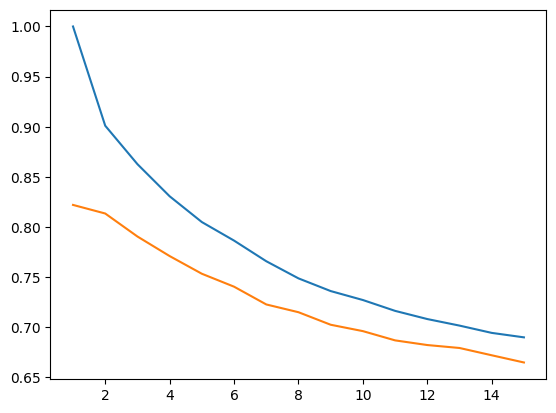

In [76]:
plt.plot(k,avg_training_accuracy)
plt.plot(k,avg_accuracy)
plt.show()

accuracy score : 0.8245227606461086



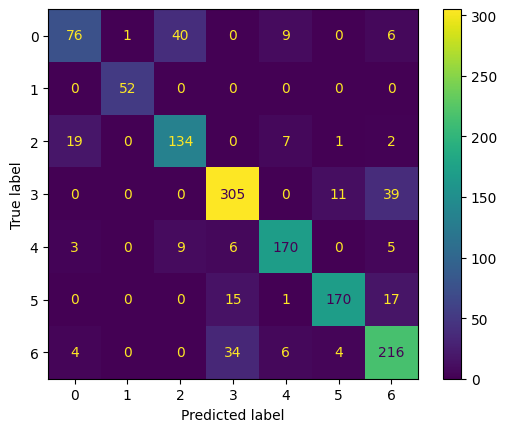


precision_score 0.836913574439697

recall score 0.8276353788966819

f1 score 0.8299303454781481


In [88]:
knn=KNeighborsClassifier(n_neighbors=1)
model=knn.fit(x_trainf,y_trainf)
predicted=model.predict(x_test)
print("accuracy score :",accuracy_score(y_test,predicted))
print("")
cm=ConfusionMatrixDisplay(confusion_matrix(y_test,predicted))
cm.plot()
plt.show()
print("")
print("precision_score",np.mean(precision_score(y_test,predicted,average=None)))
print("")
print("recall score",np.mean(recall_score(y_test,predicted,average=None)))
print("")
print("f1 score",np.mean(f1_score(y_test,predicted,average=None)))

